# atmodeller

## Science Cases

Following the Monte Carlo approach in 3_monte_carlo.ipynb, we sample the possible atmospheres of known exoplanets that can arise for different planetary conditions.


In [1]:
#from atmodeller import debug_logger
from typing import Type
from atmodeller.interior_atmosphere import InteriorAtmosphereSystem, Planet, Species
from atmodeller.constraints import MassConstraint, IronWustiteBufferConstraintHirschmann, IronWustiteBufferConstraintOneill, SystemConstraints, FugacityConstraint, PressureConstraint, TotalPressureConstraint
from atmodeller.eos.holland import (
    CO2_CORK_simple_HP91,
    CO2_MRK_simple_HP91,
    get_holland_eos_models,
)
from atmodeller.eos.saxena import (
    get_saxena_eos_models
)
from atmodeller.interfaces import (
    GasSpecies,
    IdealGas,
    NoSolubility,
    RealGasABC,
    ThermodynamicData,
    ThermodynamicDataBase,
)
from atmodeller.solubilities import PeridotiteH2O, BasaltDixonCO2, BasaltLibourelN2, BasaltDixonH2O, BasaltS2, BasaltH2, BasaltCO, BasaltCl2, BasaltCH4
from atmodeller.utilities import earth_oceans_to_kg
import numpy as np
import csv
from atmodeller import debug_logger
import logging

thermodynamic_data: Type[ThermodynamicDataBase] = ThermodynamicData

eos_models_HP: dict[str, RealGasABC] = get_holland_eos_models()
eos_models_SS: dict[str, RealGasABC] = get_saxena_eos_models()

logger = debug_logger()
logger.setLevel(logging.INFO)


In [2]:
#Plotting Tools:
import matplotlib
import matplotlib.pyplot as plt
plt.rc("savefig", dpi=300)
plt.rc('figure', dpi=300)
plt.rc('text', usetex=True)
plt.rc('font', size=15)
plt.rc('xtick', direction='in') 
plt.rc('ytick', direction='in')
plt.rc('xtick.major', pad=5) 
plt.rc('xtick.minor', pad=5)
plt.rc('ytick.major', pad=5) 
plt.rc('ytick.minor', pad=5)
plt.rc('lines', dotted_pattern = [0.5, 1.1])

font={'weight':'bold',
     'size': 15}
matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = (7,5)

from labellines import labelLines


## Simulating Trappist-1 e

### Vary fO2

In [3]:
species: Species = Species()
#species.append(GasSpecies(chemical_formula='H2O'))
#species.append(GasSpecies(chemical_formula='H2'))
#species.append(GasSpecies(chemical_formula='O2'))
#species.append(GasSpecies(chemical_formula='CO2'))
#species.append(GasSpecies(chemical_formula='CO'))
#species.append(GasSpecies(chemical_formula='S2'))
#species.append(GasSpecies(chemical_formula='SO2'))
#species.append(GasSpecies(chemical_formula='N2'))
species.append(GasSpecies(chemical_formula='H2O', solubility=BasaltDixonH2O()))
species.append(GasSpecies(chemical_formula='H2', solubility=BasaltH2()))
species.append(GasSpecies(chemical_formula='O2'))
species.append(GasSpecies(chemical_formula='CO2', solubility=BasaltDixonCO2()))
species.append(GasSpecies(chemical_formula='CO', solubility=BasaltCO()))
species.append(GasSpecies(chemical_formula='CH4', solubility=BasaltCH4()))
species.append(GasSpecies(chemical_formula='S2', solubility=BasaltS2()))
species.append(GasSpecies(chemical_formula='SO2'))
#species.append(GasSpecies(chemical_formula='H2S'))
species.append(GasSpecies(chemical_formula='N2', solubility=BasaltLibourelN2()))
species.append(GasSpecies(chemical_formula='Cl2', solubility=BasaltCl2()))

species

[17:38:53 - atmodeller.interfaces          - INFO     ] - Creating a GasSpecies: H2O (H2O)
[17:38:53 - atmodeller.interfaces          - INFO     ] - Creating a GasSpecies: H2 (H2)


[17:38:53 - atmodeller.interfaces          - INFO     ] - Creating a GasSpecies: O2 (O2)
[17:38:53 - atmodeller.interfaces          - INFO     ] - Creating a GasSpecies: CO2 (CO2)
[17:38:53 - atmodeller.interfaces          - INFO     ] - Creating a GasSpecies: CO (CO)
[17:38:53 - atmodeller.interfaces          - INFO     ] - Creating a GasSpecies: CH4 (CH4)
[17:38:53 - atmodeller.interfaces          - INFO     ] - Creating a GasSpecies: S2 (S2)
[17:38:53 - atmodeller.interfaces          - INFO     ] - Creating a GasSpecies: SO2 (SO2)
[17:38:53 - atmodeller.interfaces          - INFO     ] - Creating a GasSpecies: N2 (N2)
[17:38:53 - atmodeller.interfaces          - INFO     ] - Creating a GasSpecies: Cl2 (Cl2)


Species([GasSpecies(chemical_formula='H2O', name_in_thermodynamic_data='H2O', thermodynamic_class=<class 'atmodeller.interfaces.ThermodynamicDataJANAF'>, formula=Formula('H2O'), thermodynamic_data=<atmodeller.interfaces.ThermodynamicDataJANAF object at 0x1203f6f50>, output=None, solubility=<atmodeller.solubilities.BasaltDixonH2O object at 0x120427950>, solid_melt_distribution_coefficient=0, eos=IdealGas(critical_temperature=1, critical_pressure=1, standard_state_pressure=1)),
         GasSpecies(chemical_formula='H2', name_in_thermodynamic_data='H2', thermodynamic_class=<class 'atmodeller.interfaces.ThermodynamicDataJANAF'>, formula=Formula('H2'), thermodynamic_data=<atmodeller.interfaces.ThermodynamicDataJANAF object at 0x1203ddc50>, output=None, solubility=<atmodeller.solubilities.BasaltH2 object at 0x120533690>, solid_melt_distribution_coefficient=0, eos=IdealGas(critical_temperature=1, critical_pressure=1, standard_state_pressure=1)),
         GasSpecies(chemical_formula='O2', name

In [4]:
planet: Planet = Planet(surface_temperature=1500, mantle_mass = 3.249E24, surface_radius = 5.804E6, mantle_melt_fraction=1)
interior_atmosphere: InteriorAtmosphereSystem = InteriorAtmosphereSystem(species=species, planet=planet)

[17:38:58 - atmodeller.interior_atmosphere - INFO     ] - Creating a new planet
[17:38:58 - atmodeller.interior_atmosphere - INFO     ] - Mantle mass (kg) = 3248999999999999788187648.000000
[17:38:58 - atmodeller.interior_atmosphere - INFO     ] - Mantle melt fraction = 1.000000
[17:38:58 - atmodeller.interior_atmosphere - INFO     ] - Core mass fraction = 0.295335
[17:38:58 - atmodeller.interior_atmosphere - INFO     ] - Planetary radius (m) = 5804000.000000
[17:38:58 - atmodeller.interior_atmosphere - INFO     ] - Planetary mass (kg) = 4610699520224821698887680.000000
[17:38:58 - atmodeller.interior_atmosphere - INFO     ] - Surface temperature (K) = 1500.000000
[17:38:58 - atmodeller.interior_atmosphere - INFO     ] - Surface gravity (m/s^2) = 9.135193
[17:38:58 - atmodeller.interior_atmosphere - INFO     ] - Melt Composition = None
[17:38:58 - atmodeller.interior_atmosphere - INFO     ] - Creating an interior-atmosphere system
[17:38:58 - atmodeller.interior_atmosphere - INFO     ]

In [5]:
#Vary fO2:
number_of_realisations: int = 9

number_Earth_oceans: float = 1
# Parameters are normally distributed between bounds.
fo2_shifts: np.ndarray = np.arange(-4, 5)
print(fo2_shifts)
print(len(fo2_shifts))
print(fo2_shifts[6])

mass_H: float = earth_oceans_to_kg(1)
mass_S: float = mass_H/10
mass_C: float = mass_H/5
print(mass_H)
print(mass_S)
print(mass_C)

for i in range(number_of_realisations):
    print(i)


[-4 -3 -2 -1  0  1  2  3  4]
9
2
1.5500015377899477e+20
1.5500015377899477e+19
3.1000030755798954e+19
0
1
2
3
4
5
6
7
8


In [6]:
#BSE Volatile Budgets: 
#assumes Trappist-1e has same mass of volatiles as BSE

#H,C,N from Sakuraba et al. 2021, Table 1
mass_H_BSE_min: float = 2.627E20
mass_H_BSE_max: float = 2.687E21

mass_C_BSE_min: float = 2.507E20
mass_C_BSE_max: float = 4.358E21

mass_N_BSE_min: float = 4.955E18
mass_N_BSE_max: float = 1.4925E19

#S from McDonough & Sun 1995
mass_S_BSE_min: float = 1.194E21
mass_S_BSE_max: float = 1.791E21

#Cl from Sharp & Draper 2013
mass_Cl_BSE: float = 10.4E19 


In [15]:
#Running one case at time:
out: list[dict[str, float]] = []
constraints: SystemConstraints = SystemConstraints([
        MassConstraint(species="H", value=mass_H_BSE_min),
        MassConstraint(species="C", value=mass_C_BSE_min),
        MassConstraint(species="S", value=mass_S_BSE_min),
        MassConstraint(species="N", value=mass_N_BSE_min),
        MassConstraint(species="Cl", value=mass_Cl_BSE),
        #FugacityConstraint(species='SO2', value=10),
        #FugacityConstraint(species='H2O', value=100),
        #FugacityConstraint(species='S2', value=1),
        #FugacityConstraint(species='H2', value=1),
        IronWustiteBufferConstraintHirschmann(pressure=1, log10_shift=4)
    ])
    # Recall that changing attributes on the planet 'object' will be 'seen' by interior_atmosphere.
interior_atmosphere.solve(constraints, factor=0.01, initial_solution=[0.4900653823789348,0.18503277799959475,2.500763707398618e-11,71.73492094544501,69.92053996707932,3.8337621829142245e-06,0.0006400868008675706,0.00038438181318951837,1.2493854083515246,1.6602148961776756e-09])

H2_melt = interior_atmosphere.output['H2'].ppmw_in_melt
H2O_melt = interior_atmosphere.output['H2O'].ppmw_in_melt
#O2_melt = interior_atmosphere.output['O2'].ppmw_in_melt
CO2_melt = interior_atmosphere.output['CO2'].ppmw_in_melt
CO_melt = interior_atmosphere.output['CO'].ppmw_in_melt
CH4_melt = interior_atmosphere.output['CH4'].ppmw_in_melt
S2_melt = interior_atmosphere.output['S2'].ppmw_in_melt
N2_melt = interior_atmosphere.output['N2'].ppmw_in_melt
Cl2_melt = interior_atmosphere.output['Cl2'].ppmw_in_melt
print('CH4 in melt:', CH4_melt)
out_realisation: dict[str,float] = interior_atmosphere.solution_dict

# Include the parameters in the output.

out_realisation['H2_melt'] = H2_melt
out_realisation['H2O_melt'] = H2O_melt
#out_realisation['O2_melt'] = O2_melt
out_realisation['CO2_melt'] = CO2_melt
out_realisation['CO_melt'] = CO_melt
out_realisation['CH4_melt'] = CH4_melt
out_realisation['S2_melt'] = S2_melt
out_realisation['N2_melt'] = N2_melt
out_realisation['Cl2_melt'] = Cl2_melt
out_realisation['fo2_shift'] = 4
out_realisation['Total_P'] = interior_atmosphere.total_pressure

out.append(out_realisation)

#filename: str = "data/science_cases_files/atmodeller_Trappist1e_CHONSCl_BSEMin_Sols_Ideal.csv"
#print("Writing output to: %s", filename)
#fieldnames: list[str] = list(out[0].keys())
#with open(filename, "w", newline="", encoding="utf-8") as csvfile:
#    writer: csv.DictWriter = csv.DictWriter(csvfile, fieldnames=fieldnames)
#    writer.writeheader()
#    writer.writerows(out)

fieldnames: list[str] = list(out[0].keys())
with open("data/science_cases_files/atmodeller_Trappist1e_CHONSCl_BSEMin_Sols_Ideal.csv", "a", newline="", encoding="utf-8") as csvfile:
    writer: csv.DictWriter = csv.DictWriter(csvfile, fieldnames=fieldnames)
    #writer.writeheader()
    writer.writerows(out)

[17:43:54 - atmodeller.interior_atmosphere - INFO     ] - Assembling constraints
[17:43:54 - atmodeller.interior_atmosphere - INFO     ] - Constraints: [MassConstraint(name='mass', species='H', value=2.627e+20),
 MassConstraint(name='mass', species='C', value=2.507e+20),
 MassConstraint(name='mass', species='S', value=1.194e+21),
 MassConstraint(name='mass', species='N', value=4.955e+18),
 MassConstraint(name='mass', species='Cl', value=1.04e+20),
 IronWustiteBufferConstraintHirschmann(name='fugacity',
                                       species='O2',
                                       log10_shift=4,
                                       pressure=1)]
[17:43:54 - atmodeller.interior_atmosphere - INFO     ] - 5 additional (mass) constraint(s) are necessary to solve the system
[17:43:54 - atmodeller.interior_atmosphere - INFO     ] - Apply fugacity constraint for O2
[17:43:54 - atmodeller.interior_atmosphere - INFO     ] - Row 00: Reaction 0: 0.5 H2O + 0.25 CH4 = 1.0 H2 + 0.25 CO2

CH4 in melt: 1.3369852877323584e-13


In [23]:
import pandas as pd
datafile_ig: str = f"data/science_cases_files/atmodeller_Trappist1e_CHONS_1500K_BSE_Min_NoSolsAllIdeal.csv"
#df_fO2: pd.DataFrame = pd.read_csv(datafile_fO2, skiprows=1, names=('H2O_pp', 'H2_pp', 'O2_pp', 'CO2_pp', 'CO_pp', 'S2_pp', 'SO2_pp', 'H2O_melt', 'H2_melt', 'O2_melt', 'CO2_melt', 'CO_melt', 'S2_melt', 'fO2_shift'))
df_ig: pd.DataFrame = pd.read_csv(datafile_ig, skiprows=1, names=('H2O','H2','O2','CO2','CO','S2', 'SO2', 'N2', 'H2_melt','H2O_melt','O2_melt','CO2_melt','CO_melt','S2_melt', 'N2_melt', 'fO2_shift','Total_P'
))
print(df_ig)


          H2O          H2            O2         CO2         CO         S2  \
0    2.837153  338.748510  2.500764e-16    0.176933  54.535904  48.803443   
1    8.979161  339.023986  2.500764e-15    0.566064  55.174682  49.720325   
2   28.357270  338.578254  2.500764e-14    1.846881  56.926322  52.425205   
3   87.089737  328.822574  2.500764e-13    6.198709  60.419259  59.422145   
4  232.139924  277.168890  2.500764e-12   19.983265  61.594309  72.760109   
5  447.906300  169.114877  2.500764e-11   50.048029  48.782171  88.084506   
6  616.265872   73.580505  2.500764e-10   84.461359  26.033479  97.809290   
7  703.125992   26.547755  2.500764e-09  106.494060  10.380052  96.777731   
8  779.504113    9.307072  2.500764e-08  122.568419   3.777920  55.902513   

          SO2        N2  H2_melt  H2O_melt  O2_melt  CO2_melt  CO_melt  \
0    0.000001  0.463642      0.0       0.0      0.0       0.0      0.0   
1    0.000011  0.472352      0.0       0.0      0.0       0.0      0.0   
2    0.

In [ ]:
#Looping over fO2 Space (Use previous computation as initial solution)

# Store the output in a list.
out: list[dict[str, float]]= []

for realisation in range(number_of_realisations):
    constraints: SystemConstraints = SystemConstraints([
        MassConstraint(species="H", value=mass_H_BSE_min),
        MassConstraint(species="C", value=mass_C_BSE_min),
        MassConstraint(species="S", value=mass_S_BSE_min),
        MassConstraint(species="N", value=mass_N_BSE_min),
        #MassConstraint(species="Cl", value=mass_Cl),
        #FugacityConstraint(species="H2", value=fug_H2),
        #FugacityConstraint(species="CO", value=fug_CO),
        #FugacityConstraint(species="S2", value=fug_S2),
        #FugacityConstraint(species="N2", value=fug_N2),
        #FugacityConstraint(species="Cl2", value=fug_Cl2),
        IronWustiteBufferConstraintHirschmann(pressure=1, log10_shift=fo2_shifts[realisation])
    ])
    print('fO2 Shift:', fo2_shifts[realisation])
    
    initialsol_arr=[]
    for i in df_ig.iloc[realisation][0:8]:
        initialsol_arr.append(i)

    print('Initial Solution:', initialsol_arr)
    # Recall that changing attributes on the planet 'object' will be 'seen' by interior_atmosphere.
    interior_atmosphere.solve(constraints, factor=0.01, initial_solution=initialsol_arr)
    

    H2_melt = interior_atmosphere.output['H2'].ppmw_in_melt
    H2O_melt = interior_atmosphere.output['H2O'].ppmw_in_melt
    #O2_melt = interior_atmosphere.output['O2'].ppmw_in_melt
    CO2_melt = interior_atmosphere.output['CO2'].ppmw_in_melt
    CO_melt = interior_atmosphere.output['CO'].ppmw_in_melt
    S2_melt = interior_atmosphere.output['S2'].ppmw_in_melt
    N2_melt = interior_atmosphere.output['N2'].ppmw_in_melt
    #Cl2_melt = interior_atmosphere.output['Cl2'].ppmw_in_melt

    out_realisation: dict[str,float] = interior_atmosphere.solution_dict

    # Include the parameters in the output.

    out_realisation['H2_melt'] = H2_melt
    out_realisation['H2O_melt'] = H2O_melt
    #out_realisation['O2_melt'] = O2_melt
    out_realisation['CO2_melt'] = CO2_melt
    out_realisation['CO_melt'] = CO_melt
    out_realisation['S2_melt'] = S2_melt
    out_realisation['N2_melt'] = N2_melt
    #out_realisation['Cl2_melt'] = Cl2_melt

    out_realisation['fo2_shift'] = fo2_shifts[realisation]
    out_realisation['Total_P'] = interior_atmosphere.total_pressure

    out.append(out_realisation)

    filename: str = "data/science_cases_files/atmodeller_Trappist1e_CHONS_1500K_BSEmin_varyfO2_IdealGas_WithSols.csv"
    print("Writing output to: %s", filename)
    fieldnames: list[str] = list(out[0].keys())
    with open(filename, "w", newline="", encoding="utf-8") as csvfile:
        writer: csv.DictWriter = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(out)
    

In [18]:
import pandas as pd
datafile_fO2: str = f"data/science_cases_files/atmodeller_Trappist1e_CHONSCl_BSEMin_Sols_Ideal.csv"

#df_fO2: pd.DataFrame = pd.read_csv(datafile_fO2, skiprows=1, names=('H2O_pp', 'H2_pp', 'O2_pp', 'CO2_pp', 'CO_pp', 'S2_pp', 'SO2_pp', 'H2O_melt', 'H2_melt', 'O2_melt', 'CO2_melt', 'CO_melt', 'S2_melt', 'fO2_shift'))
df_fO2: pd.DataFrame = pd.read_csv(datafile_fO2, skiprows=1, names=('H2O','H2','O2','CO2','CO','CH4','S2','SO2','N2','Cl2','H2_melt','H2O_melt','CO2_melt','CO_melt','CH4_melt','S2_melt','N2_melt','Cl2_melt','fO2_shift','Total_P'
))

print(df_fO2)

#print(df_fO2.S2 + df_fO2.O2 + df_fO2.SO2)

        H2O         H2            O2         CO2          CO           CH4  \
0  0.094221  11.249791  2.500764e-16    0.336902  103.843226  6.655645e+00   
1  0.178561   6.741886  2.500764e-15    1.189502  115.941658  8.439669e-01   
2  0.277190   3.309578  2.500764e-14    3.843774  118.476449  6.572042e-02   
3  0.369715   1.395926  2.500764e-13   11.799682  115.012343  3.589153e-03   
4  0.441514   0.527156  2.500764e-12   32.691345  100.764356  1.418102e-04   
5  0.490065   0.185033  2.500764e-11   71.734921   69.920540  3.833762e-06   
6  0.520102   0.062099  2.500764e-10  112.472163   34.667234  6.770309e-08   
7  0.537712   0.020302  2.500764e-09  136.223947   13.277845  8.764748e-10   
8  0.547737   0.006540  2.500764e-08  149.470619    4.607125  9.978985e-12   

             S2           SO2        N2           Cl2    H2_melt    H2O_melt  \
0  6.400942e-09  1.215529e-11  0.000026  1.660215e-09  44.852032  296.211709   
1  6.400942e-08  3.843840e-10  0.000815  1.660215e-09  34.2

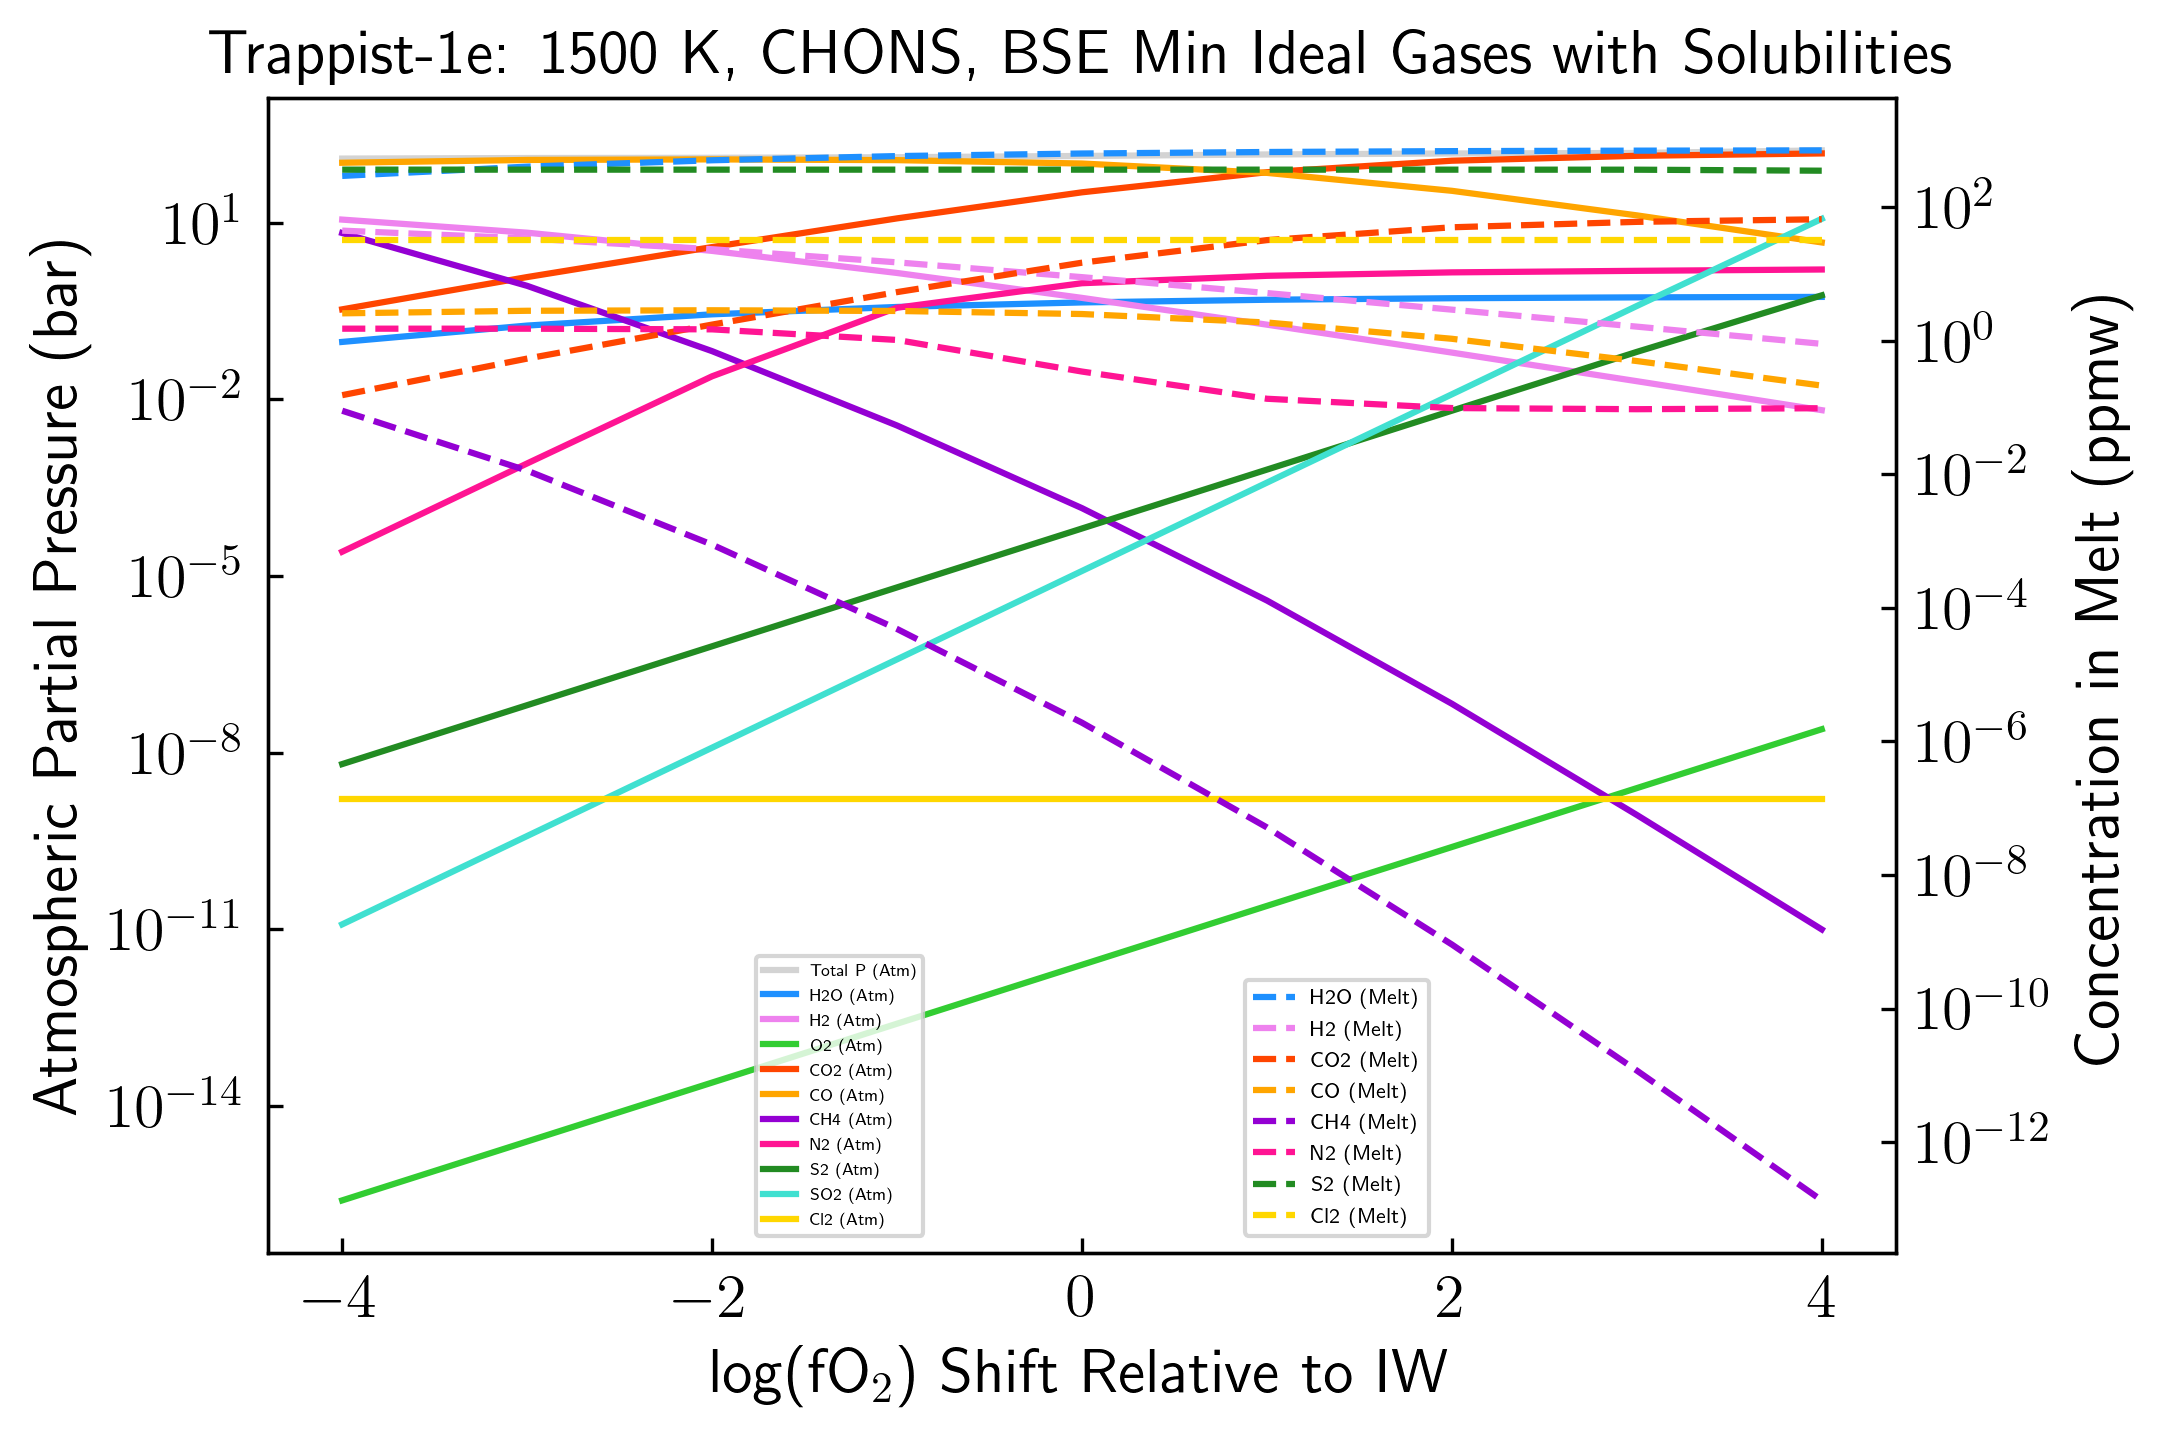

In [21]:
fig, ax = plt.subplots()
ax.plot(df_fO2.fO2_shift, df_fO2.Total_P, color='lightgrey', label='Total P (Atm)')
ax.plot(df_fO2.fO2_shift, df_fO2.H2O, color='dodgerblue', label='H2O (Atm)')
ax.plot(df_fO2.fO2_shift, df_fO2.H2, color='violet', label='H2 (Atm)')
ax.plot(df_fO2.fO2_shift, df_fO2.O2, color='limegreen',  label='O2 (Atm)')
ax.plot(df_fO2.fO2_shift, df_fO2.CO2, color='orangered', label='CO2 (Atm)')
ax.plot(df_fO2.fO2_shift, df_fO2.CO, color='orange', label='CO (Atm)')
ax.plot(df_fO2.fO2_shift, df_fO2.CH4, color='darkviolet', label='CH4 (Atm)')
ax.plot(df_fO2.fO2_shift, df_fO2.N2, color='deeppink', label='N2 (Atm)')
ax.plot(df_fO2.fO2_shift, df_fO2.S2,  color='forestgreen', label='S2 (Atm)')
ax.plot(df_fO2.fO2_shift, df_fO2.SO2, color='turquoise', label='SO2 (Atm)')
ax.plot(df_fO2.fO2_shift, df_fO2.Cl2, color='gold', label='Cl2 (Atm)')
#xvals=[-1,-2,-3,-3.5,-1,-2,-3,-3.5,-1]
#lines=plt.gca().get_lines()
#labelLines(lines, align=True, xvals=xvals, fontsize=9)

ax2 = ax.twinx()
ax2.plot(df_fO2.fO2_shift, df_fO2.H2O_melt, color='dodgerblue', linestyle='--', label='H2O (Melt)')
ax2.plot(df_fO2.fO2_shift, df_fO2.H2_melt, color='violet', linestyle='--', label='H2 (Melt)')
#ax2.plot(df_fO2.fO2_shift, df_fO2.O2_melt, color='limegreen', linestyle='--', label='O2 (Melt)')
ax2.plot(df_fO2.fO2_shift, df_fO2.CO2_melt, color='orangered', linestyle='--', label='CO2 (Melt)')
ax2.plot(df_fO2.fO2_shift, df_fO2.CO_melt, color='orange', linestyle='--', label='CO (Melt)')
ax2.plot(df_fO2.fO2_shift, df_fO2.CH4_melt, color='darkviolet', linestyle='--', label='CH4 (Melt)')
ax2.plot(df_fO2.fO2_shift, df_fO2.N2_melt, color='deeppink', linestyle='--', label='N2 (Melt)')
ax2.plot(df_fO2.fO2_shift, df_fO2.S2_melt, color='forestgreen', linestyle='--', label='S2 (Melt)')
ax2.plot(df_fO2.fO2_shift, df_fO2.Cl2_melt, color='gold', linestyle='--', label='Cl2 (Melt)')

ax.set_xlabel(r'log(fO$_2$) Shift Relative to IW')
#ax.set_xlabel('')
ax.set_ylabel('Atmospheric Partial Pressure (bar)')
ax2.set_ylabel('Concentration in Melt (ppmw)')
ax.set_yscale('log')
#ax.set_ylim(1e-2, 1e3)
ax2.set_yscale('log')
#ax2.set_ylim(1e-2, 1e5)
ax.legend(fontsize=4, loc=(0.3,0.015))
ax2.legend(fontsize=5, loc=(0.6, 0.015))



plt.title(r'Trappist-1e: 1500 K, CHONS, BSE Min Ideal Gases with Solubilities', fontsize=15)
#plt.savefig('data/Plots/PlanetTrial1_HotTrappist1e_CHONS_1500K_BSEMin_NoSol.jpg', dpi=1000)
plt.show()



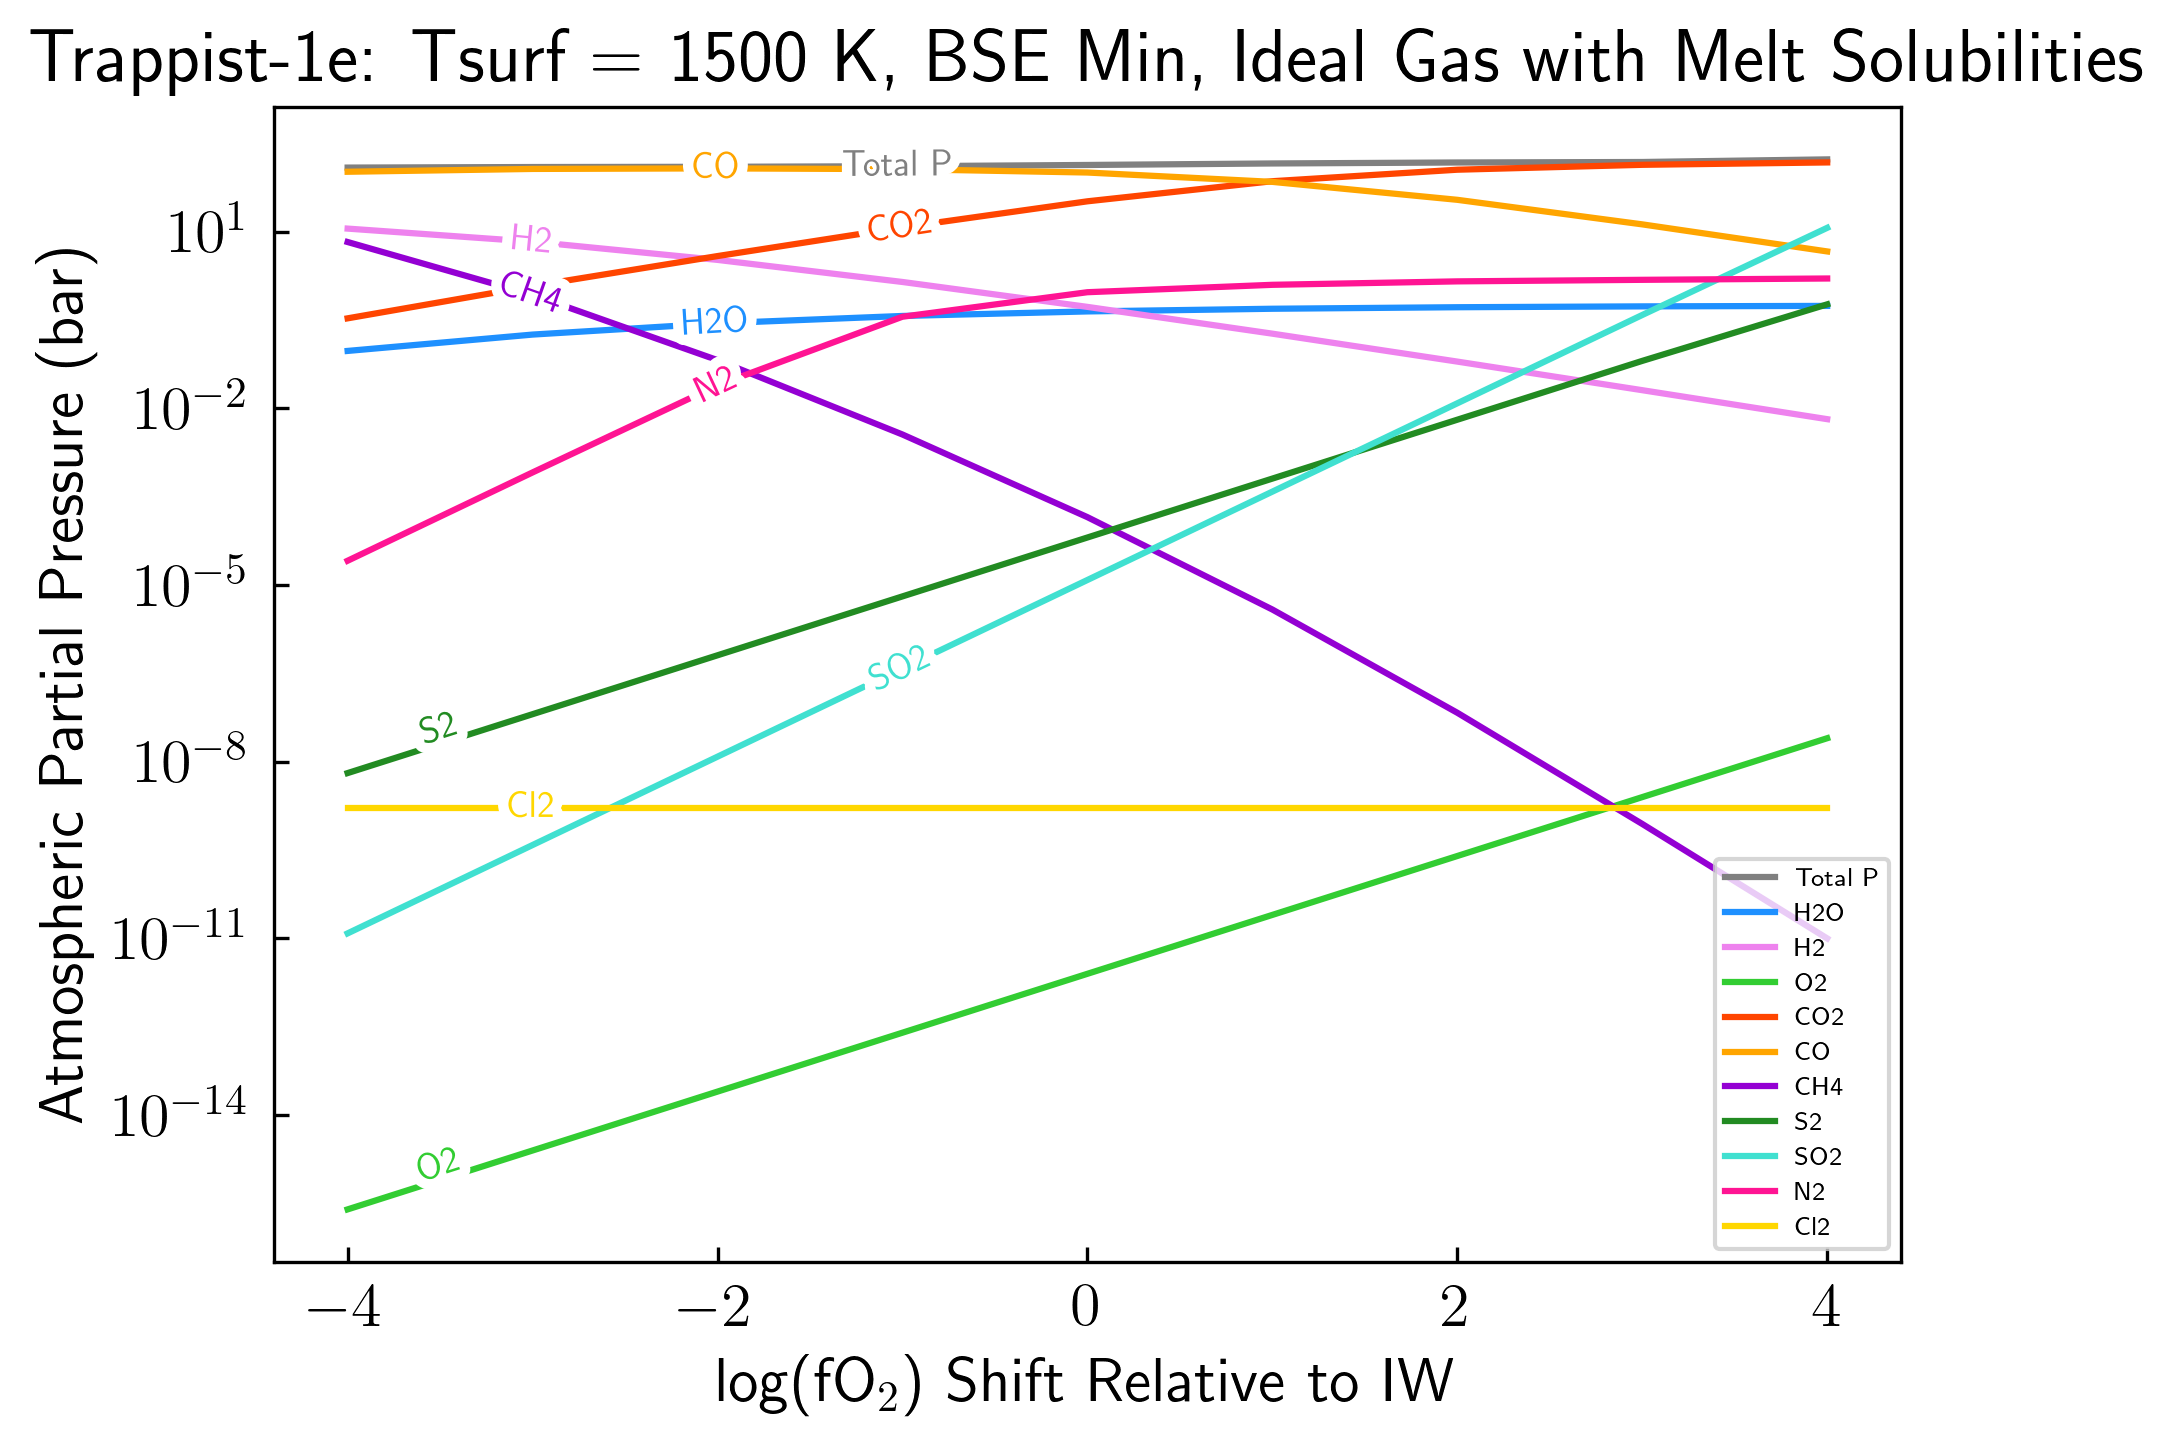

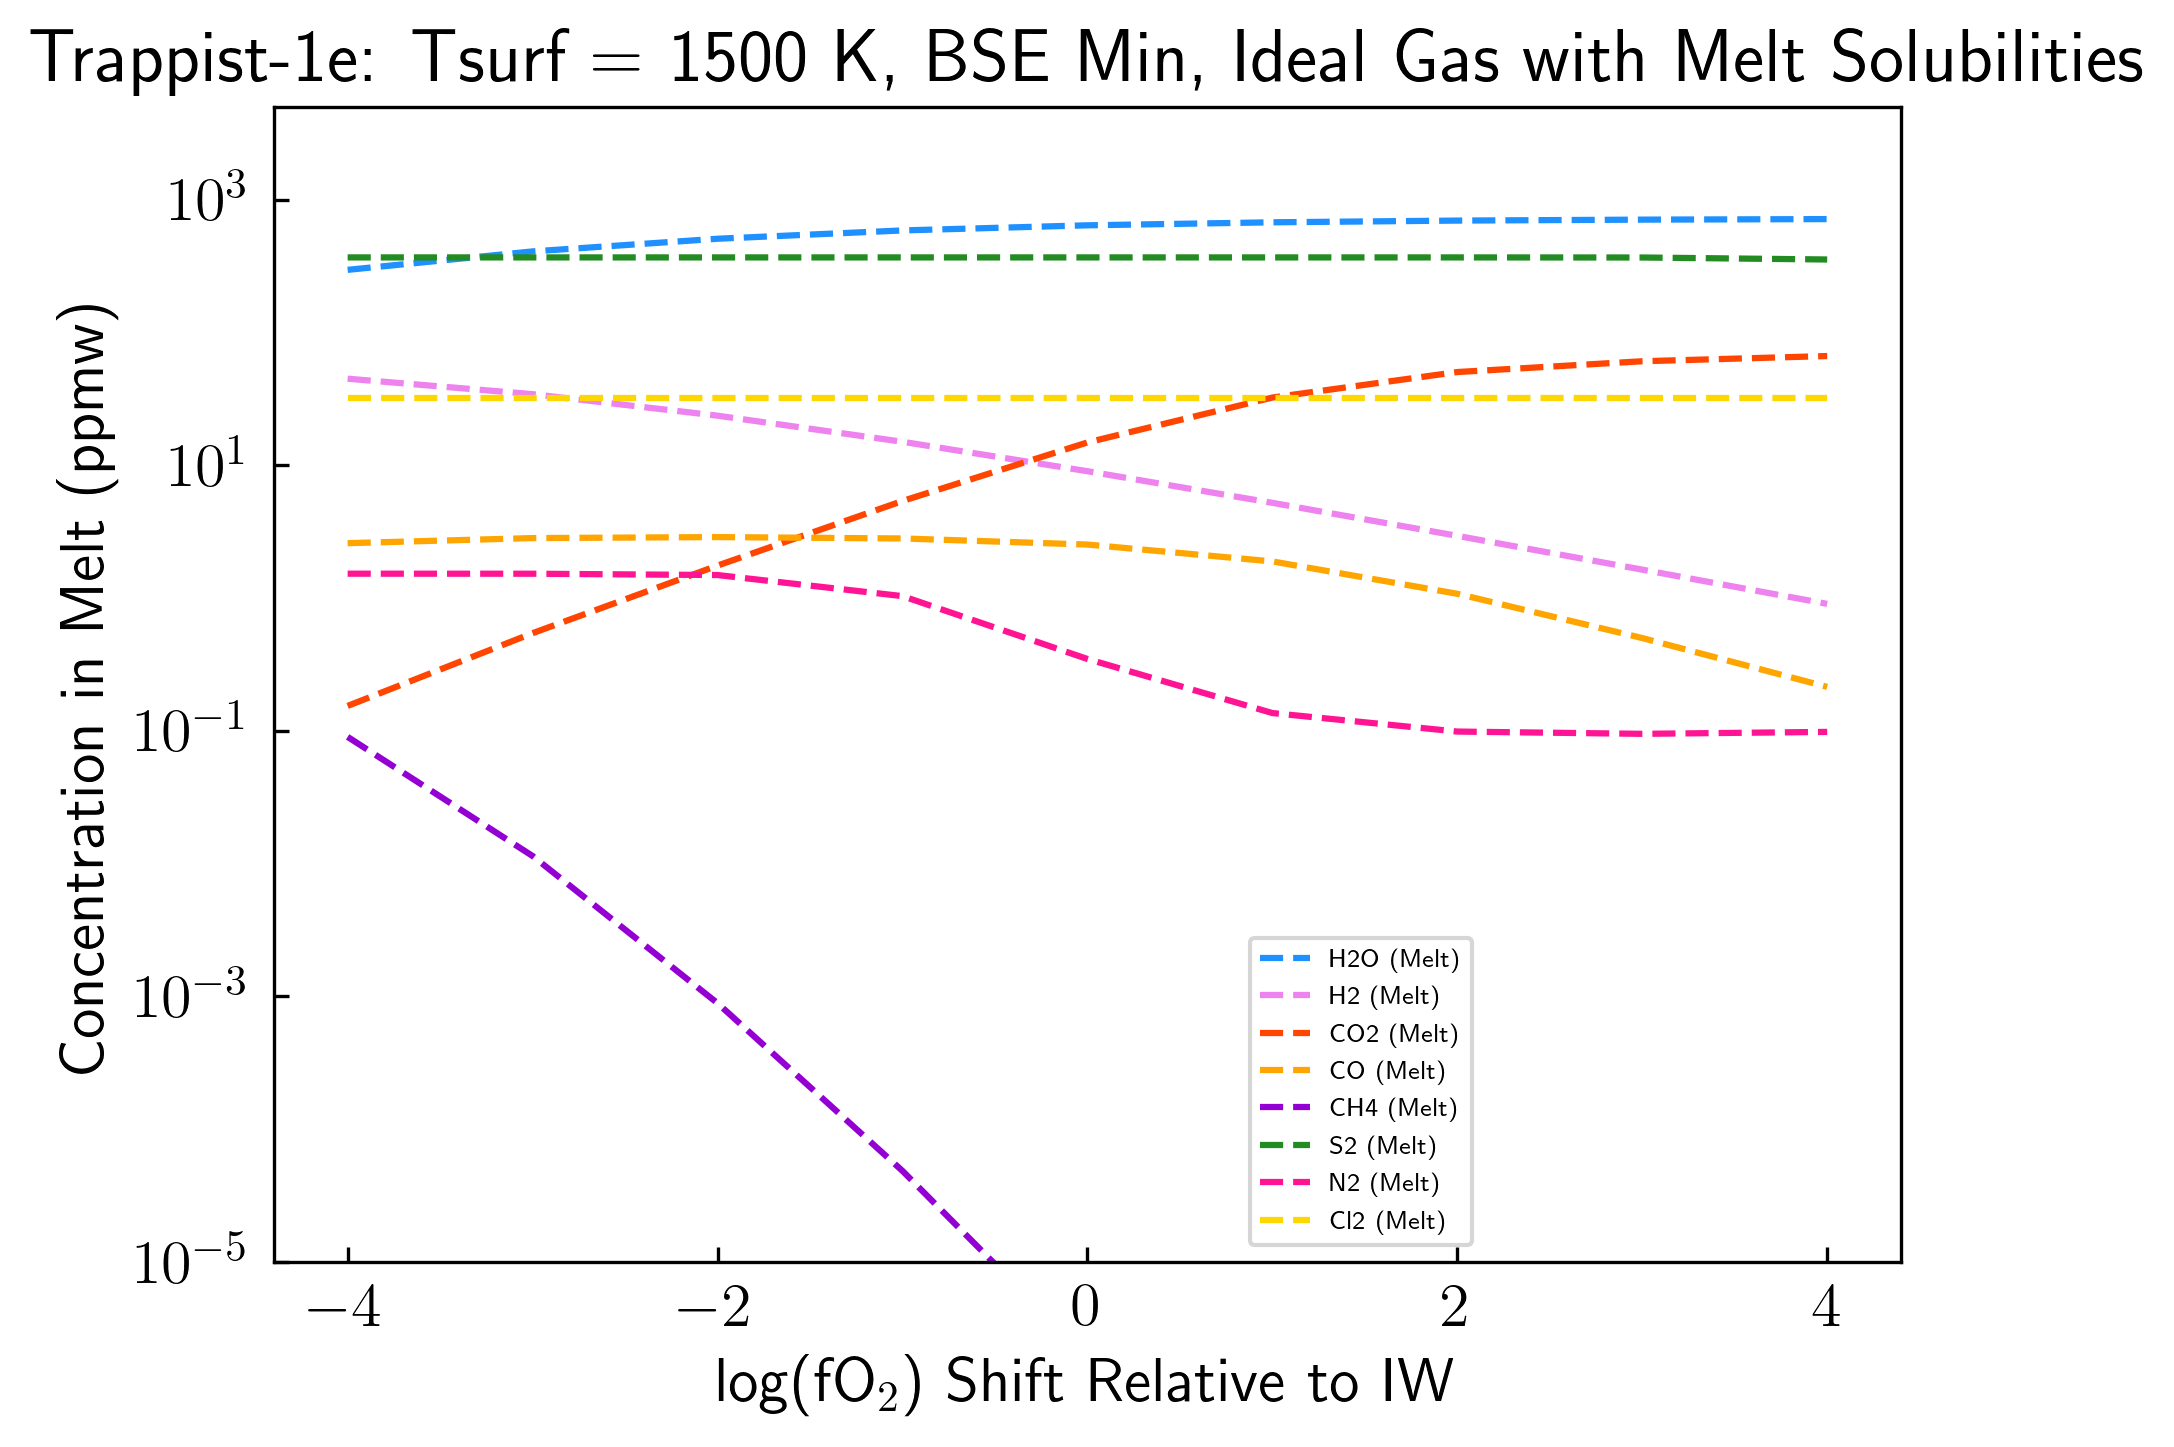

In [28]:
fig, ax = plt.subplots()
ax.plot(df_fO2.fO2_shift, df_fO2.Total_P, color='gray', label='Total P')
ax.plot(df_fO2.fO2_shift, df_fO2.H2O, color='dodgerblue', label='H2O')
ax.plot(df_fO2.fO2_shift, df_fO2.H2, color='violet', label='H2')
ax.plot(df_fO2.fO2_shift, df_fO2.O2, color='limegreen', label='O2')
ax.plot(df_fO2.fO2_shift, df_fO2.CO2, color='orangered', label='CO2')
ax.plot(df_fO2.fO2_shift, df_fO2.CO, color='orange', label='CO')
ax.plot(df_fO2.fO2_shift, df_fO2.CH4, color='darkviolet', label='CH4')
ax.plot(df_fO2.fO2_shift, df_fO2.S2, color='forestgreen', label='S2')
ax.plot(df_fO2.fO2_shift, df_fO2.SO2, color='turquoise', label='SO2')
ax.plot(df_fO2.fO2_shift, df_fO2.N2, color='deeppink', label='N2')
ax.plot(df_fO2.fO2_shift, df_fO2.Cl2, color='gold', label='Cl2')

ax.set_xlabel(r'log(fO$_2$) Shift Relative to IW')
ax.set_ylabel('Atmospheric Partial Pressure (bar)')
ax.set_yscale('log')
#ax.set_ylim(1e-5, 1e3)
ax.legend(fontsize=6)
xvals=[-1,-2,-3,-3.5,-1,-2,-3,-3.5,-1, -2, -3]
lines=plt.gca().get_lines()
labelLines(lines, align=True, xvals=xvals, fontsize=9)
plt.title(r'Trappist-1e: Tsurf = 1500 K, BSE Min, Ideal Gas with Melt Solubilities')
#plt.savefig('data/Plots/PlanetTrial1_HotTrappist1e_1500K_BSE_Max_HCNSMass_Atm.jpg', dpi=1000, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots()

ax.plot(df_fO2.fO2_shift, df_fO2.H2O_melt, color='dodgerblue', linestyle='--', label='H2O (Melt)')
ax.plot(df_fO2.fO2_shift, df_fO2.H2_melt, color='violet', linestyle='--', label='H2 (Melt)')
#ax2.plot(df_fO2.fO2_shift, df_fO2.O2_melt, color='limegreen', linestyle='--', label='O2 (Melt)')
ax.plot(df_fO2.fO2_shift, df_fO2.CO2_melt, color='orangered', linestyle='--', label='CO2 (Melt)')
ax.plot(df_fO2.fO2_shift, df_fO2.CO_melt, color='orange', linestyle='--', label='CO (Melt)')
ax.plot(df_fO2.fO2_shift, df_fO2.CH4_melt, color='darkviolet', linestyle='--', label='CH4 (Melt)')

ax.plot(df_fO2.fO2_shift, df_fO2.S2_melt, color='forestgreen', linestyle='--', label='S2 (Melt)')
ax.plot(df_fO2.fO2_shift, df_fO2.N2_melt, color='deeppink', linestyle='--', label='N2 (Melt)')
ax.plot(df_fO2.fO2_shift, df_fO2.Cl2_melt, color='gold', linestyle='--', label='Cl2 (Melt)')

ax.set_ylabel('Concentration in Melt (ppmw)')
ax.set_yscale('log')
ax.set_ylim(1e-5, 5e3)
ax.set_xlabel(r'log(fO$_2$) Shift Relative to IW')
ax.legend(fontsize=6, loc=(0.6, 0.015))
#plt.title(r'Hot (Young?) Trappist-1e: Tsurf = 2000 K, M = 0.7M$_\oplus$, R = 0.9 R$_\oplus$')
plt.title(r'Trappist-1e: Tsurf = 1500 K, BSE Min, Ideal Gas with Melt Solubilities')
#plt.savefig('data/Plots/PlanetTrial1_HotTrappist1e_1500K_BSE_Max_HCNSMass_Melt.jpg', dpi=1000, bbox_inches='tight')
plt.show()

## Simulating K2-18 b

In [158]:
planet: Planet = Planet(surface_temperature=1500, mantle_mass = 3.6315E25, surface_radius = 1.6647E7)
#planet: Planet = Planet()


[17:25:28 - atmodeller.interior_atmosphere - INFO     ] - Creating a new planet
[17:25:28 - atmodeller.interior_atmosphere - INFO     ] - Mantle mass (kg) = 36315000000000001830813696.000000
[17:25:28 - atmodeller.interior_atmosphere - INFO     ] - Mantle melt fraction = 1.000000
[17:25:28 - atmodeller.interior_atmosphere - INFO     ] - Core mass fraction = 0.295335
[17:25:28 - atmodeller.interior_atmosphere - INFO     ] - Planetary radius (m) = 16647000.000000


[17:25:28 - atmodeller.interior_atmosphere - INFO     ] - Planetary mass (kg) = 51535104055698495989874688.000000
[17:25:28 - atmodeller.interior_atmosphere - INFO     ] - Surface temperature (K) = 1500.000000
[17:25:28 - atmodeller.interior_atmosphere - INFO     ] - Surface gravity (m/s^2) = 12.411862
[17:25:28 - atmodeller.interior_atmosphere - INFO     ] - Melt Composition = None


In [159]:
species: Species = Species(
        [
            GasSpecies(
                chemical_formula="H2",
                solubility=BasaltH2(),
                thermodynamic_class=thermodynamic_data,
                eos=eos_models_SS["H2"],
            ),
            GasSpecies(
                chemical_formula="H2O",
                solubility=BasaltDixonH2O(),
                thermodynamic_class=thermodynamic_data,
                eos=eos_models_HP["H2O"],
            ),
            GasSpecies(
                chemical_formula="O2",
                solubility=NoSolubility(),
                thermodynamic_class=thermodynamic_data,
                eos=eos_models_SS["O2"]
            ),
            #GasSpecies(
            #    chemical_formula="CO",
            #    solubility=BasaltCO(),
            #    thermodynamic_class=thermodynamic_data,
                #eos=eos_models_HP["CO"],
            #),
            #GasSpecies(
            #    chemical_formula="CO2",
            #    solubility=BasaltDixonCO2(),
            #    thermodynamic_class=thermodynamic_data,
            #    #eos=eos_models_HP["CO2"],
            #),
            #GasSpecies(
            #    chemical_formula="CH4",
            #    solubility=NoSolubility(),
            #    thermodynamic_class=thermodynamic_data,
            #    #eos=eos_models_HP["CH4"],
            #),
        ]
    )

[17:25:34 - atmodeller.interfaces          - INFO     ] - Creating a GasSpecies: H2 (H2)


[17:25:34 - atmodeller.interfaces          - INFO     ] - Adding thermodynamic data: Holland and Powell
[17:25:34 - atmodeller.interfaces          - WARNING  ] - Combining different thermodynamic data may result in inconsistencies
[17:25:34 - atmodeller.interfaces          - INFO     ] - Adding thermodynamic data: JANAF
[17:25:34 - atmodeller.interfaces          - INFO     ] - Creating a GasSpecies: H2O (H2O)
[17:25:34 - atmodeller.interfaces          - INFO     ] - Adding thermodynamic data: Holland and Powell
[17:25:34 - atmodeller.interfaces          - WARNING  ] - Combining different thermodynamic data may result in inconsistencies
[17:25:34 - atmodeller.interfaces          - INFO     ] - Adding thermodynamic data: JANAF
[17:25:34 - atmodeller.interfaces          - INFO     ] - Creating a GasSpecies: O2 (O2)
[17:25:34 - atmodeller.interfaces          - INFO     ] - Adding thermodynamic data: Holland and Powell
[17:25:34 - atmodeller.interfaces          - WARNING  ] - Combining diff

In [160]:
interior_atmosphere: InteriorAtmosphereSystem = InteriorAtmosphereSystem(species=species, planet=planet)

[17:26:21 - atmodeller.interior_atmosphere - INFO     ] - Creating an interior-atmosphere system
[17:26:21 - atmodeller.interior_atmosphere - INFO     ] - Creating a reaction network
[17:26:21 - atmodeller.interior_atmosphere - INFO     ] - Species = ['H2', 'H2O', 'O2']
[17:26:21 - atmodeller.interior_atmosphere - INFO     ] - Reactions = 
{0: '2.0 H2O = 2.0 H2 + 1.0 O2'}


In [190]:
#Vary amount of H (expressed as Earth oceans)

number_of_realisations: int = 26

number_Earth_oceans_arr: np.ndarray = np.arange(10,520,20)

print((number_Earth_oceans_arr[25]))

for i in range(number_of_realisations):
    print(i)


510
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [ ]:
out: list[dict[str, float]] = []

for realisation in range(number_of_realisations):

    constraints: SystemConstraints = SystemConstraints([
        MassConstraint(species="H", value=earth_oceans_to_kg(number_Earth_oceans_arr[realisation])),
        IronWustiteBufferConstraintHirschmann(pressure=1),

    ])
    
    #initial_solution: np.ndarray = np.array([H2_fug, 1000, 1e-13])
    # Recall that changing attributes on the planet 'object' will be 'seen' by interior_atmosphere.
    interior_atmosphere.solve(constraints, factor=1)
    #out_realisation: dict[str,float] = interior_atmosphere.solution_dict
    Total_P = interior_atmosphere.output['total_pressure_in_atmosphere']
    H2_fug = interior_atmosphere.output['H2'].fugacity
    H2O_fug = interior_atmosphere.output['H2O'].fugacity
    O2_fug = interior_atmosphere.output['O2'].fugacity

    H2_mass = interior_atmosphere.output['H2'].mass_in_atmosphere
    H2O_mass = interior_atmosphere.output['H2O'].mass_in_atmosphere
    O2_mass = interior_atmosphere.output['O2'].mass_in_atmosphere 

    H2_melt = interior_atmosphere.output['H2'].ppmw_in_melt
    H2O_melt = interior_atmosphere.output['H2O'].ppmw_in_melt
    O2_melt = interior_atmosphere.output['O2'].ppmw_in_melt

    H2_melt_mass= interior_atmosphere.output['H2'].mass_in_melt
    H2O_melt_mass = interior_atmosphere.output['H2O'].mass_in_melt
    O2_melt_mass = interior_atmosphere.output['O2'].mass_in_melt

    H2_totalmass = interior_atmosphere.output['H2'].mass_in_total
    H2O_totalmass = interior_atmosphere.output['H2O'].mass_in_total
    O2_totalmass = interior_atmosphere.output['O2'].mass_in_total
    #CO2_melt = interior_atmosphere.output['CO2'].ppmw_in_melt
    #CO_melt = interior_atmosphere.output['CO'].ppmw_in_melt

    out_realisation: dict[str,float] = interior_atmosphere.solution_dict

    # Include the parameters in the output.

    out_realisation['H2_melt'] = H2_melt
    out_realisation['H2O_melt'] = H2O_melt
    out_realisation['O2_melt'] = O2_melt
    #out_realisation['CO2_melt'] = CO2_melt
    #out_realisation['CO_melt'] = CO_melt
    out_realisation['H2_mass_atm'] = H2_mass
    out_realisation['H2O_mass_atm'] = H2O_mass
    out_realisation['O2_mass_atm'] = O2_mass

    out_realisation['H2_mass_melt'] = H2_melt_mass
    out_realisation['H2O_mass_melt'] = H2O_melt_mass
    out_realisation['O2_mass_melt'] = O2_melt_mass  

    out_realisation['H2_mass_tot'] = H2_totalmass
    out_realisation['H2O_mass_tot'] = H2O_totalmass
    out_realisation['O2_mass_tot'] = O2_totalmass   

    out_realisation['H2_fugacity'] = H2_fug     
    out_realisation['H2O_fugacity'] = H2O_fug
    out_realisation['O2_fugacity'] = O2_fug


    out_realisation['H2_Mass_input'] = number_Earth_oceans_arr[realisation]
    out_realisation['Total_Pressure']=Total_P

    out.append(out_realisation)

    filename: str = "data/science_cases_files/atmodeller_K218b_RealGas_1500K_VaryHMass.csv"
    print("Writing output to: %s", filename)
    fieldnames: list[str] = list(out[0].keys())
    with open(filename, "w", newline="", encoding="utf-8") as csvfile:
        writer: csv.DictWriter = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(out)

#### Analyze Results

In [197]:
import pandas as pd
datafile_K218b_R: str = f"data/science_cases_files/atmodeller_K218b_RealGas_1500K_VaryHMass.csv"
#df_K218b_try: pd.DataFrame = pd.read_csv(datafile_K218b_try, skiprows=1, names=('H2','H2O','O2','CO','CO2','CH4','H2_melt','H2O_melt','O2_melt','CO2_melt','CO_melt','H2_fugacity'))
df_K218b_R: pd.DataFrame = pd.read_csv(datafile_K218b_R, skiprows=1, names=('H2','H2O','O2','H2_melt','H2O_melt','O2_melt','H2_mass_atm', 'H2O_mass_atm', 'O2_mass_atm', 
                                                                                'H2_mass_melt', 'H2O_mass_melt', 'O2_mass_melt', 'H2_mass_tot', 'H2O_mass_tot', 'O2_mass_tot', 'H2_fug', 'H2O_fug', 'O2_fug', 'H_Mass_input', 'Total_Pressure'))

#datafile_K218b_I: str = f"data/science_cases_files/atmodeller_K218b_varyH2Pto2GPa_IdealGas_1500K.csv"
#df_K218b_try: pd.DataFrame = pd.read_csv(datafile_K218b_try, skiprows=1, names=('H2','H2O','O2','CO','CO2','CH4','H2_melt','H2O_melt','O2_melt','CO2_melt','CO_melt','H2_fugacity'))
#df_K218b_I: pd.DataFrame = pd.read_csv(datafile_K218b_I, skiprows=1, names=('H2','H2O','O2','H2_melt','H2O_melt','O2_melt','H2_mass_atm', 'H2O_mass_atm', 'O2_mass_atm', 
                                                                                #'H2_mass_melt', 'H2O_mass_melt', 'O2_mass_melt', 'H2_mass_tot', 'H2O_mass_tot', 'O2_mass_tot', 'H2_fugacity', 'Total_Pressure'))

#print(df_K218b_R.H_Mass_input)

0      10
1      30
2      50
3      70
4      90
5     110
6     130
7     150
8     170
9     190
10    210
11    230
12    250
13    270
14    290
15    310
16    330
17    350
18    370
19    390
20    410
21    430
22    450
23    470
24    490
25    510
Name: H_Mass_input, dtype: int64


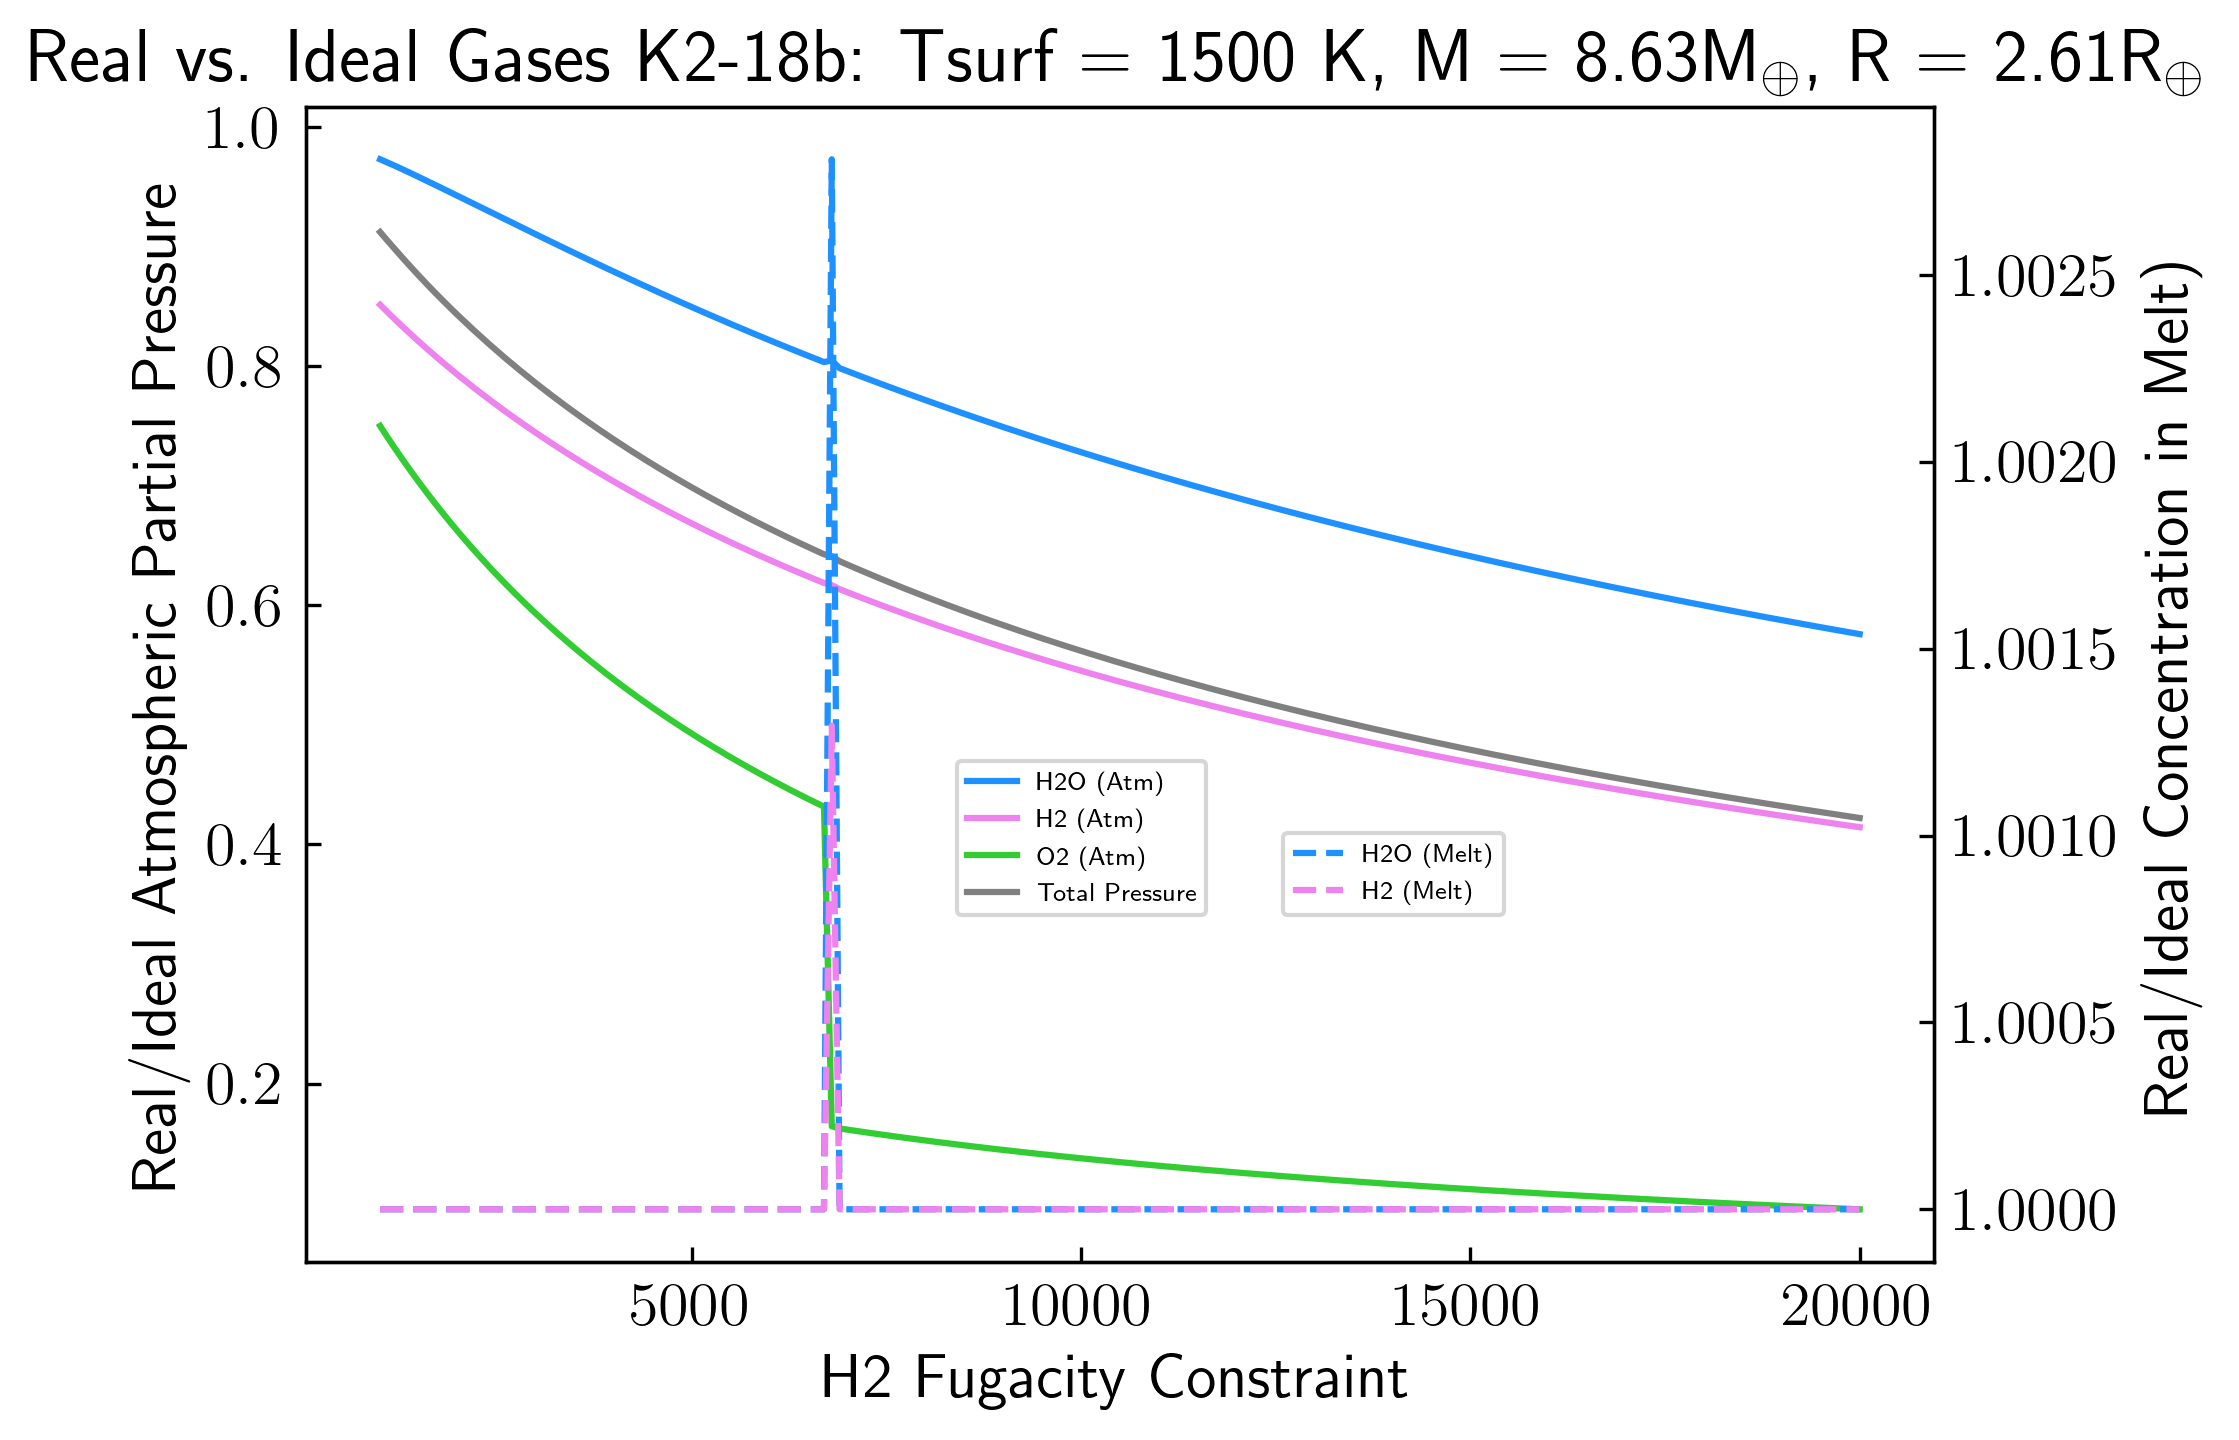

In [38]:
fig, ax = plt.subplots()
ax.plot(df_K218b_I.H2_fugacity, df_K218b_R.H2O/df_K218b_I.H2O, color='dodgerblue', label='H2O (Atm)')
ax.plot(df_K218b_I.H2_fugacity, df_K218b_R.H2/df_K218b_I.H2, color='violet', label='H2 (Atm)')
ax.plot(df_K218b_I.H2_fugacity, df_K218b_R.O2/df_K218b_I.O2, color='limegreen', label='O2 (Atm)')
ax.plot(df_K218b_I.H2_fugacity, df_K218b_R.Total_Pressure/df_K218b_I.Total_Pressure, color='gray', label='Total Pressure')
#ax.plot(df_K218b_try.H2, df_K218b_try.CO2, color='orangered', label='CO2 (Atm)')
#ax.plot(df_K218b_try.H2, df_K218b_try.CO, color='orange', label='CO (Atm)')
#ax.plot(df_K218b_try.H2, df_K218b_try.CH4, color='deeppink', label='CH4 (Atm)')


ax2 = ax.twinx()
ax2.plot(df_K218b_I.H2_fugacity, df_K218b_R.H2O_melt/df_K218b_I.H2O_melt, color='dodgerblue', linestyle='--', label='H2O (Melt)')
ax2.plot(df_K218b_I.H2_fugacity, df_K218b_R.H2_melt/df_K218b_I.H2_melt, color='violet', linestyle='--', label='H2 (Melt)')
#ax2.plot(df_fO2.fO2_shift, df_fO2.O2_melt, color='limegreen', linestyle='--', label='O2 (Melt)')
#ax2.plot(df_K218b_try.H2, df_K218b_try.CO2_melt, color='orangered', linestyle='--', label='CO2 (Melt)')
#ax2.plot(df_K218b_try.H2, df_K218b_try.CO_melt, color='orange', linestyle='--', label='CO (Melt)')
#ax.axvline(x=7500, color='gray', alpha=0.5)

ax.set_xlabel(r'H2 Fugacity Constraint')
ax.set_ylabel('Real/Ideal Atmospheric Partial Pressure')
ax2.set_ylabel('Real/Ideal Concentration in Melt)')
#ax.set_yscale('log')
#ax2.set_yscale('log')

ax.legend(fontsize=6, loc=(0.4, 0.3))
ax2.legend(fontsize=6, loc=(0.6, 0.3))
plt.title(r'Real vs. Ideal Gases K2-18b: Tsurf = 1500 K, M = 8.63M$_\oplus$, R = 2.61R$_\oplus$')
plt.savefig('data/Plots/K218b_HO_1500K_RealvsIdealGas_Pupto2GPa.jpg', dpi=1000, bbox_inches='tight')
plt.show()

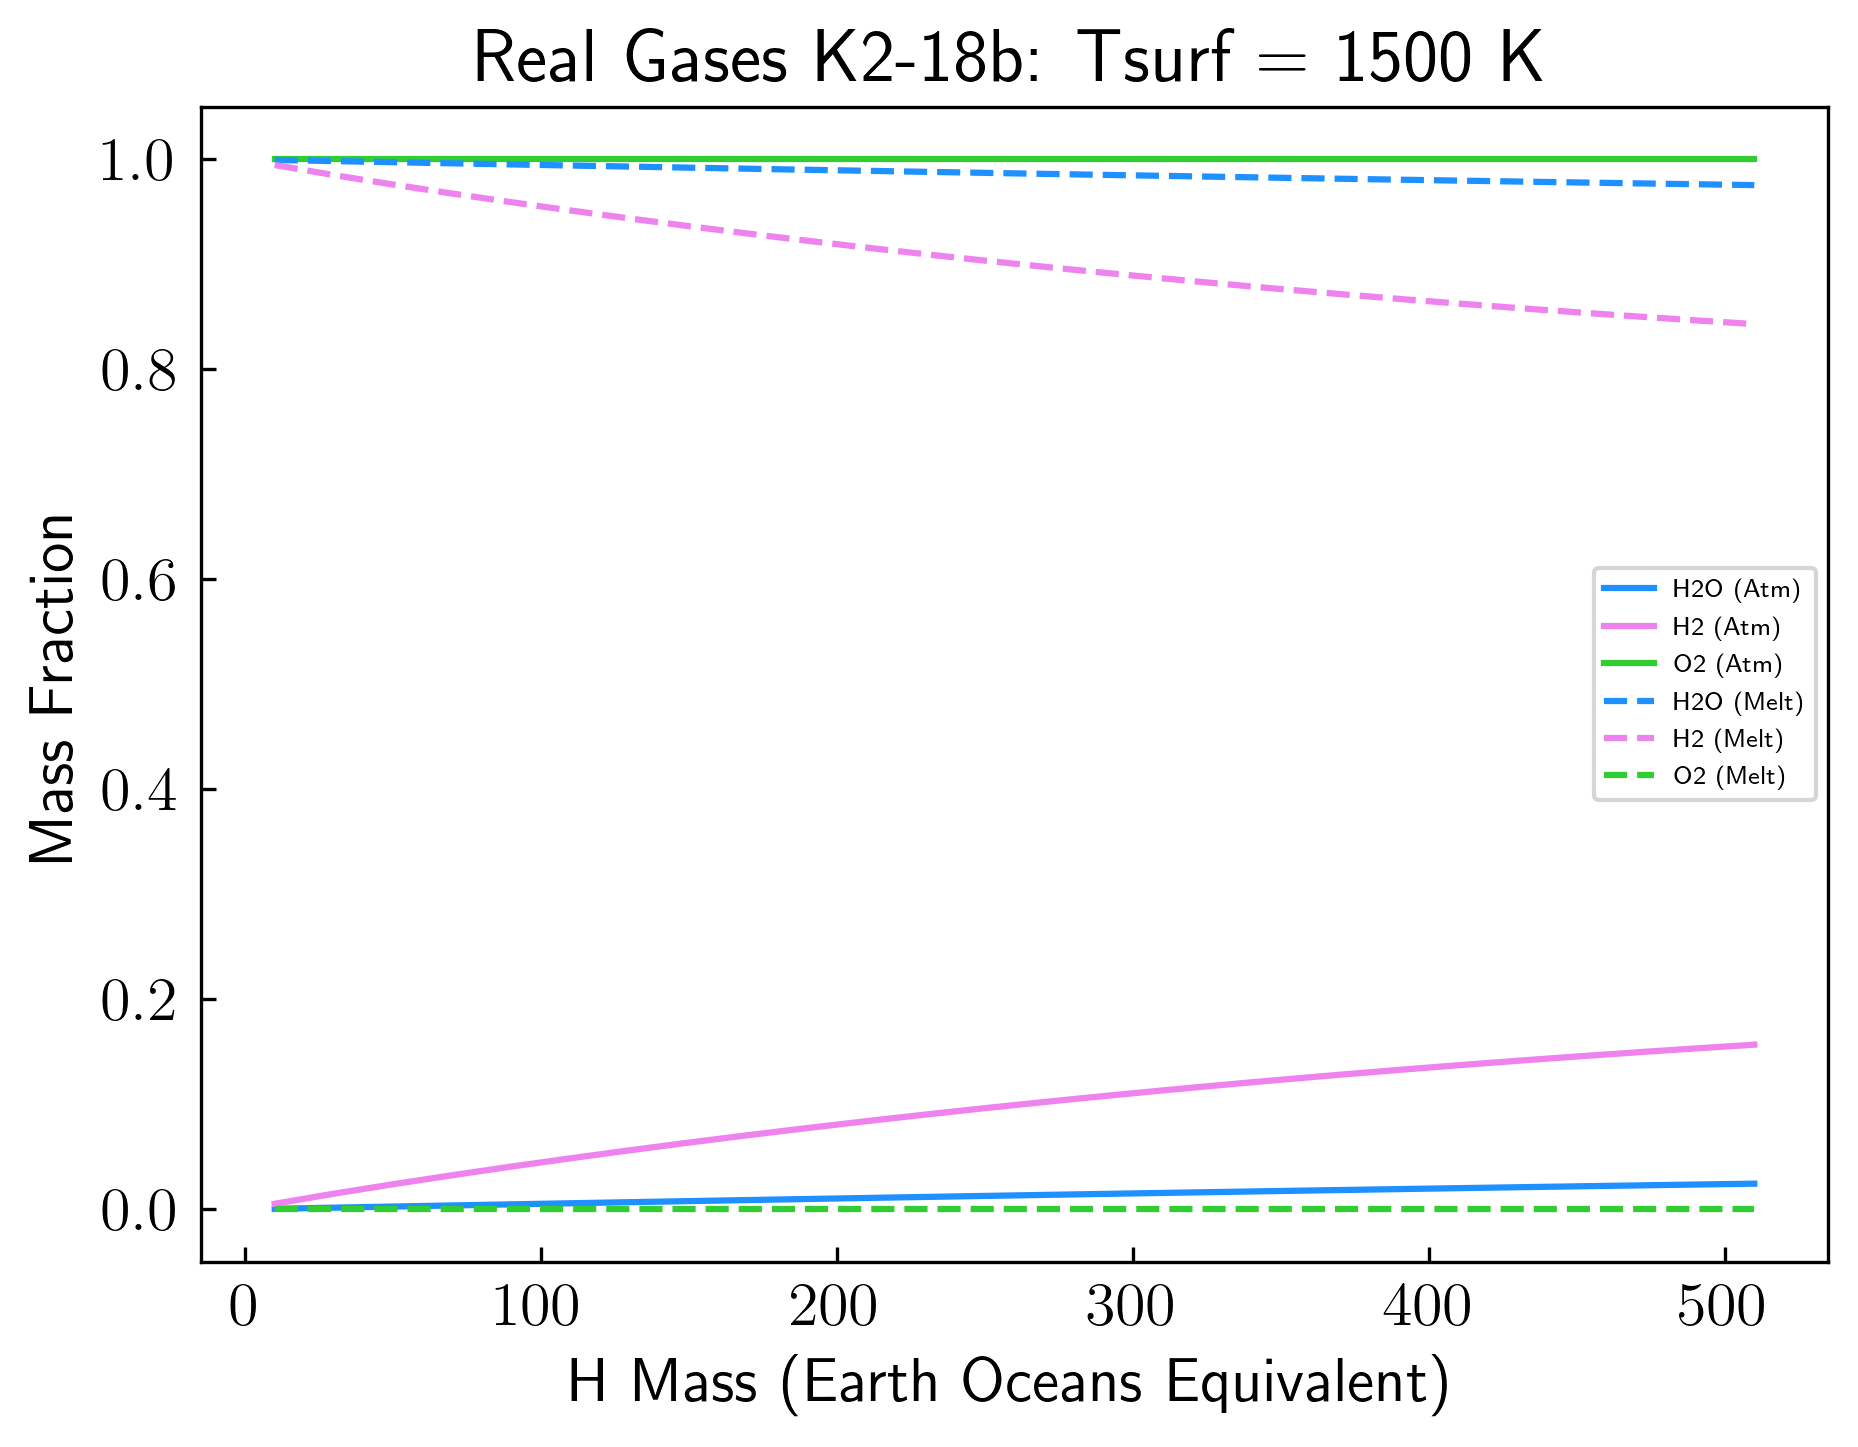

In [198]:
fig, ax = plt.subplots()
ax.plot(df_K218b_R.H_Mass_input, df_K218b_R.H2O_mass_atm/df_K218b_R.H2O_mass_tot, color='dodgerblue', label='H2O (Atm)')
ax.plot(df_K218b_R.H_Mass_input, df_K218b_R.H2_mass_atm/df_K218b_R.H2_mass_tot, color='violet', label='H2 (Atm)')
ax.plot(df_K218b_R.H_Mass_input, df_K218b_R.O2_mass_atm//df_K218b_R.O2_mass_tot, color='limegreen', label='O2 (Atm)')

ax.plot(df_K218b_R.H_Mass_input, df_K218b_R.H2O_mass_melt/df_K218b_R.H2O_mass_tot, color='dodgerblue', ls='--', label='H2O (Melt)')
ax.plot(df_K218b_R.H_Mass_input, df_K218b_R.H2_mass_melt/df_K218b_R.H2_mass_tot, color='violet', ls='--', label='H2 (Melt)')
ax.plot(df_K218b_R.H_Mass_input, df_K218b_R.O2_mass_melt/df_K218b_R.O2_mass_tot, color='limegreen', ls='--',  label='O2 (Melt)')
#ax.plot(df_K218b_try.H2, df_K218b_try.Total_Pressure, color='gray', label='Total Pressure')


ax.set_xlabel(r'H Mass (Earth Oceans Equivalent)')
ax.set_ylabel('Mass Fraction')
#ax.set_ylim(1, 1e6)
#ax.set_yscale('log')

ax.legend(fontsize=6)
plt.title(r'Real Gases K2-18b: Tsurf = 1500 K')
#plt.savefig('data/Plots/K218b_HO_1500K_RealGas_Pupto2GPa_MassFracs.jpg', dpi=1000, bbox_inches='tight')
plt.show()

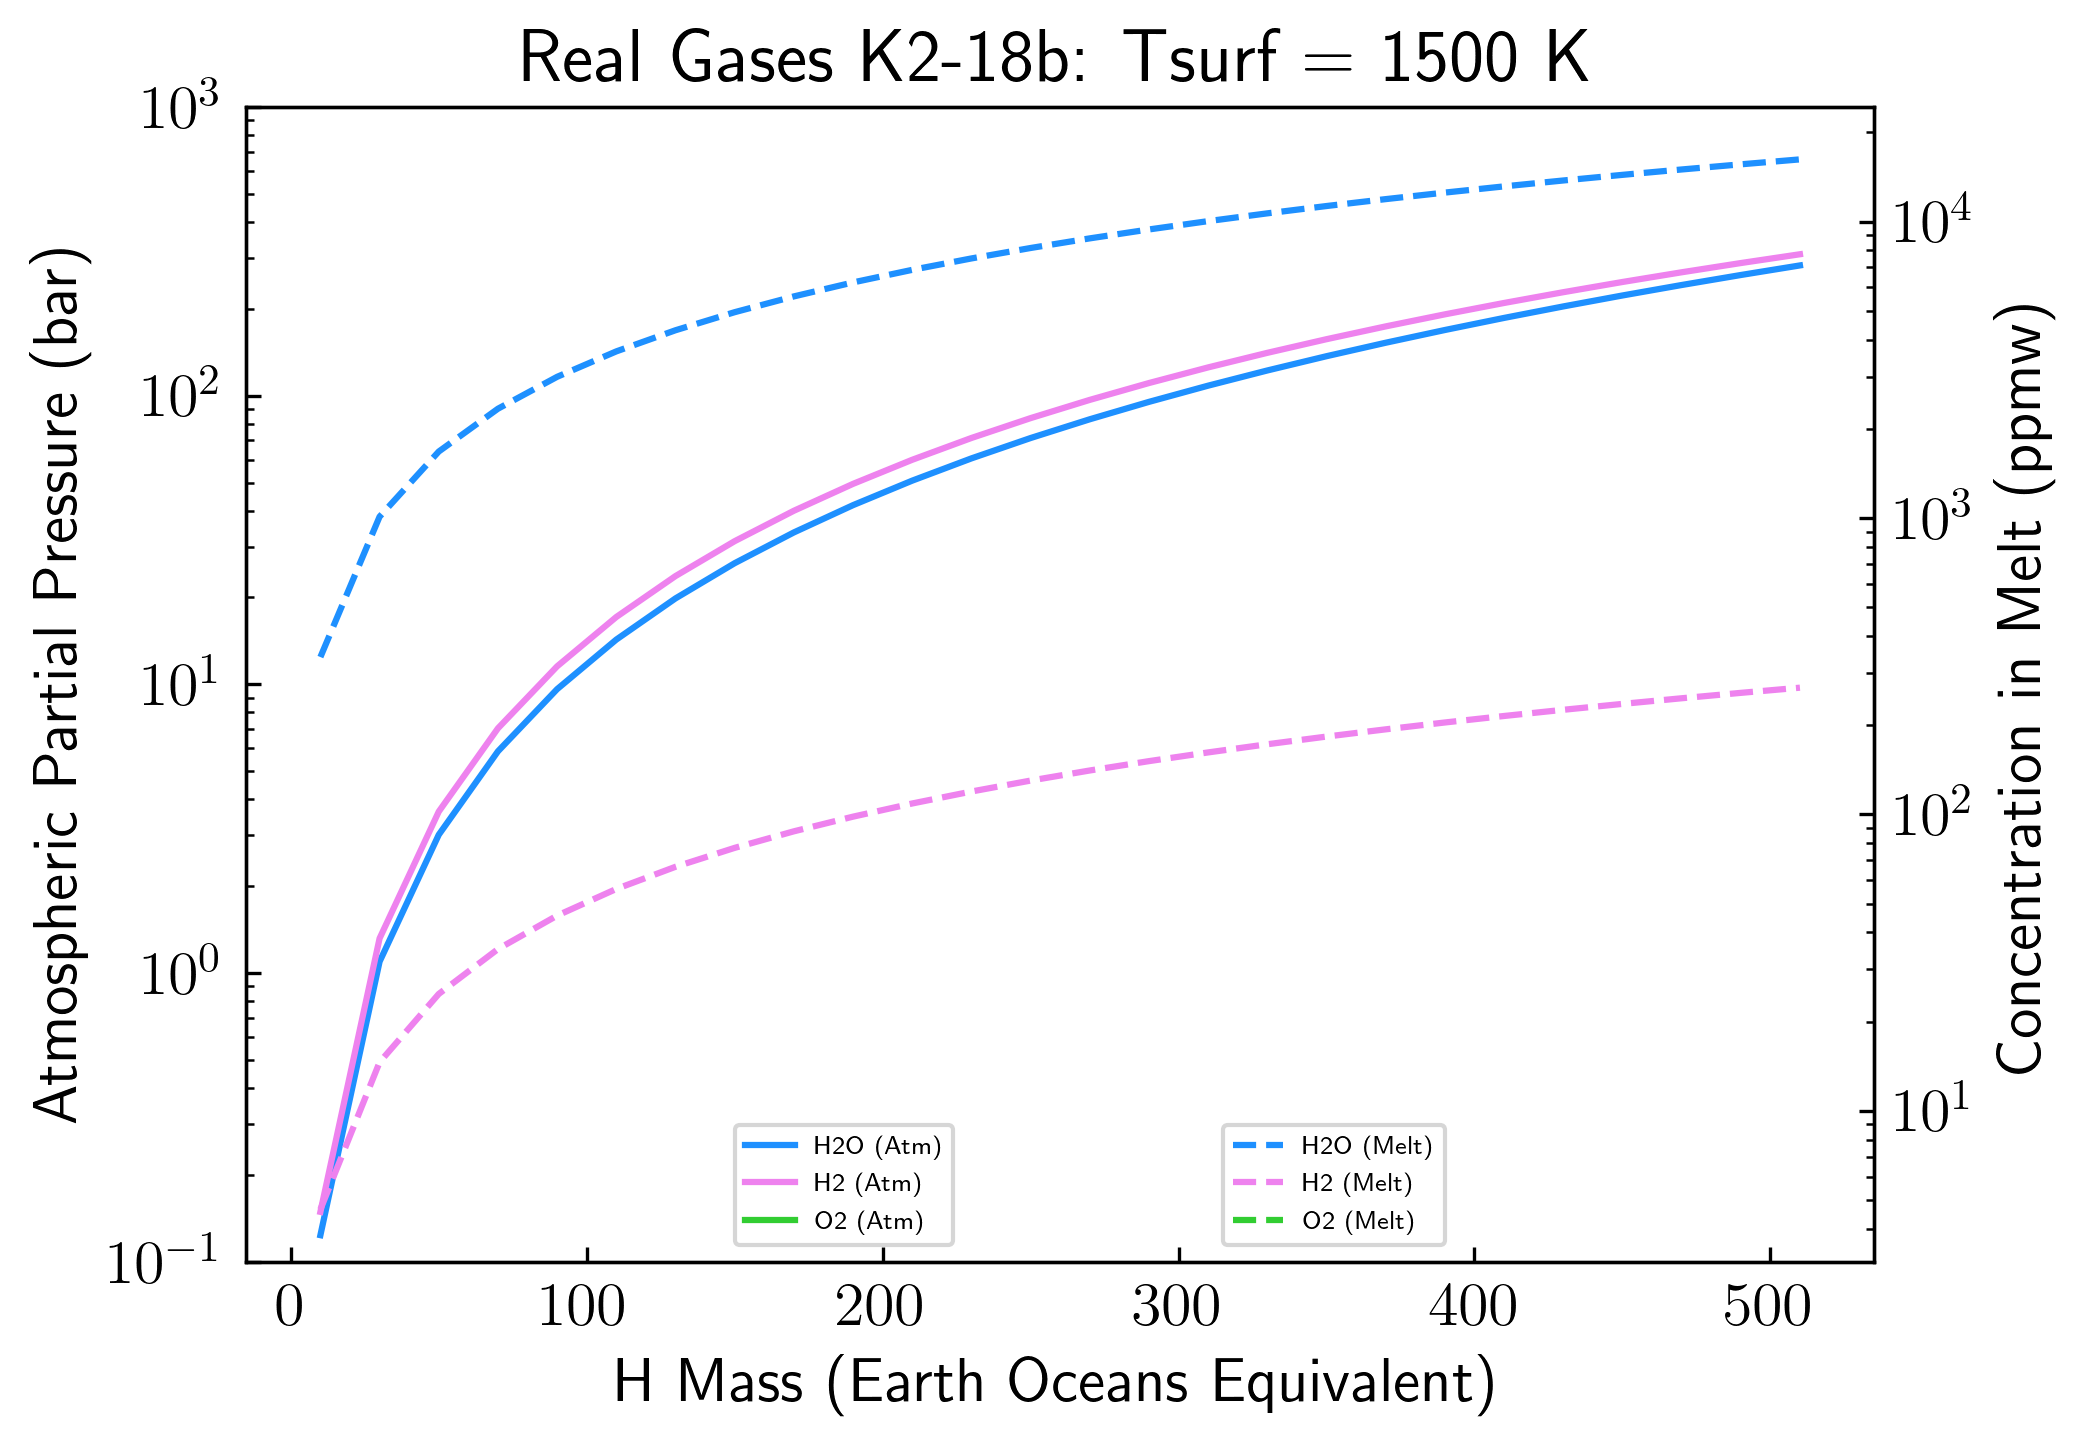

In [201]:
fig, ax = plt.subplots()
ax.plot(df_K218b_R.H_Mass_input, df_K218b_R.H2O, color='dodgerblue', label='H2O (Atm)')
ax.plot(df_K218b_R.H_Mass_input, df_K218b_R.H2, color='violet', label='H2 (Atm)')
ax.plot(df_K218b_R.H_Mass_input, df_K218b_R.O2, color='limegreen', label='O2 (Atm)')

ax2 = ax.twinx()
ax2.plot(df_K218b_R.H_Mass_input, df_K218b_R.H2O_melt, color='dodgerblue', ls='--', label='H2O (Melt)')
ax2.plot(df_K218b_R.H_Mass_input, df_K218b_R.H2_melt, color='violet', ls='--', label='H2 (Melt)')
ax2.plot(df_K218b_R.H_Mass_input, df_K218b_R.O2_melt, color='limegreen', ls='--',  label='O2 (Melt)')
#ax.plot(df_K218b_try.H2, df_K218b_try.Total_Pressure, color='gray', label='Total Pressure')


ax.set_xlabel(r'H Mass (Earth Oceans Equivalent)')
ax.set_ylabel('Atmospheric Partial Pressure (bar)')
ax2.set_ylabel('Concentration in Melt (ppmw)')
ax.set_yscale('log')
ax.set_ylim(1e-1, 1e3)
ax2.set_yscale('log')
#ax2.set_ylim(1e-2, 1e5)
ax.legend(fontsize=6, loc=(0.3,0.015))
ax2.legend(fontsize=6, loc=(0.6, 0.015))

plt.title(r'Real Gases K2-18b: Tsurf = 1500 K')
#plt.savefig('data/Plots/K218b_HO_1500K_RealGas_Pupto2GPa_MassFracs.jpg', dpi=1000, bbox_inches='tight')
plt.show()

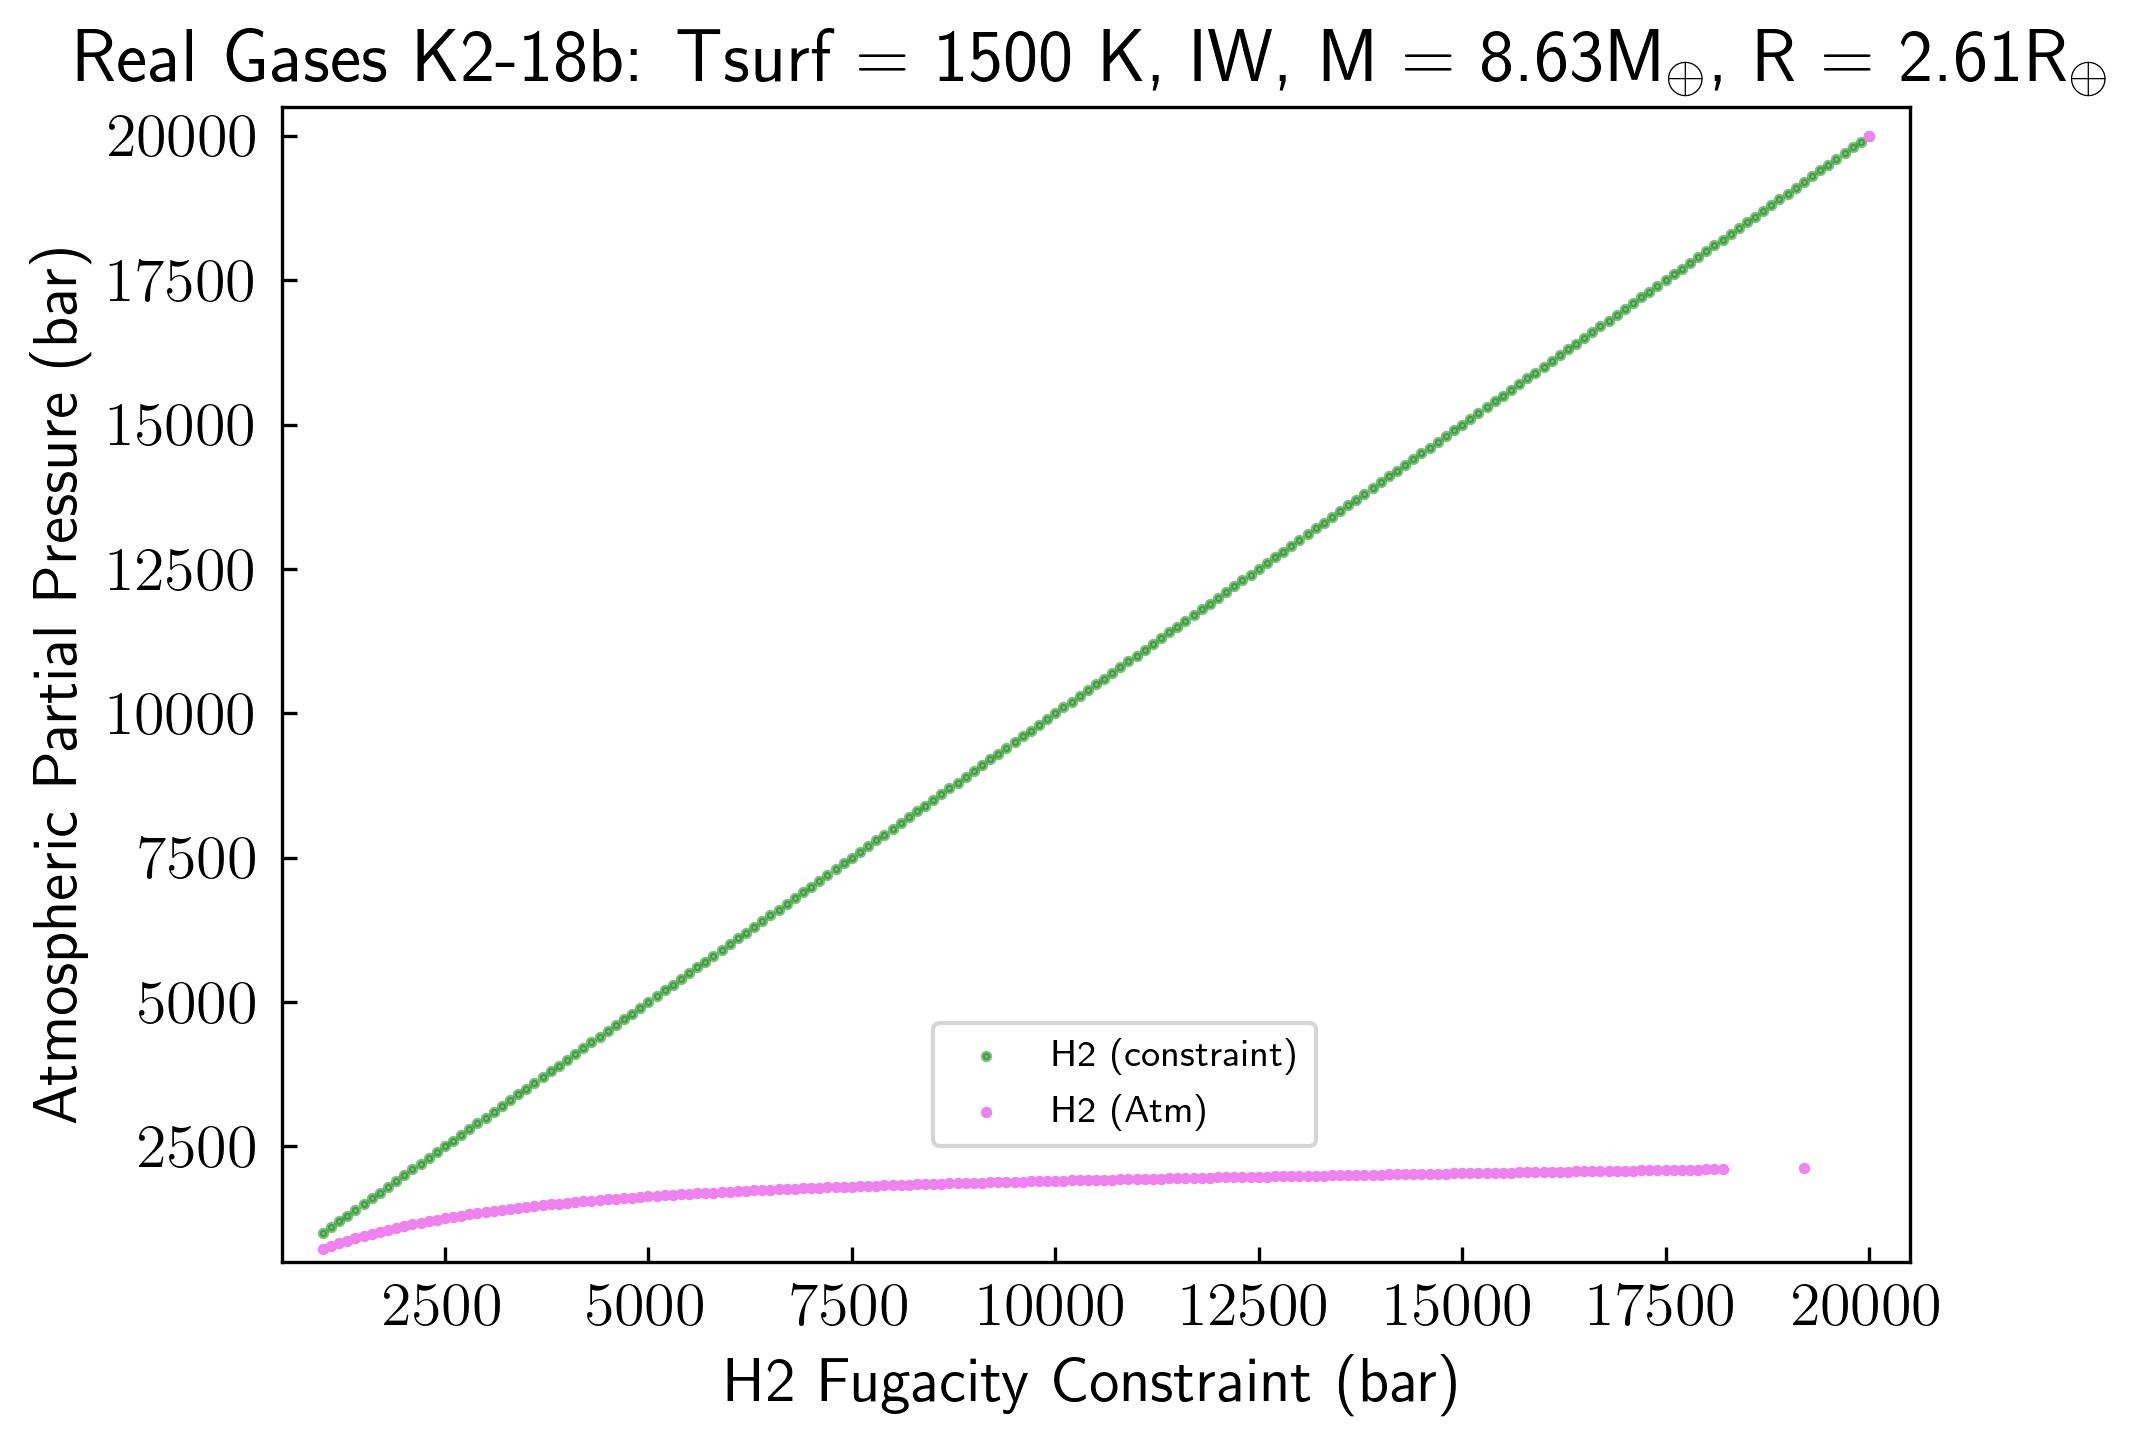

In [38]:
fig, ax = plt.subplots()
#ax.scatter(df_K218b_try.H2_fugacity, df_K218b_try.H2O, s=3, color='dodgerblue', label='H2O (Atm)')
ax.scatter(df_K218b_try.H2_fugacity, df_K218b_try.H2_fugacity, s=3, color='green', alpha=0.5, label='H2 (constraint)')
ax.scatter(df_K218b_try.H2_fugacity, df_K218b_try.H2, s=3, color='violet', label='H2 (Atm)')

#ax2 = ax.twinx()
#ax2.plot(df_K218b_try.H2_fugacity, df_K218b_try.H2O_melt, color='dodgerblue', linestyle='--', label='H2O (Melt)')
#ax2.plot(df_K218b_try.H2_fugacity, df_K218b_try.H2_melt, color='violet', linestyle='--', label='H2 (Melt)')
ax.set_xlim(500,20500)
ax.set_ylim(500,20500)

#ax3 = ax.twiny()
#ax3.plot(df_K218b_try.H2_fugacity, df_K218b_try.H2)
#ax3.set_xlabel(r'H2 Fugacity Constraint (bar)')
ax.set_xlabel(r'H2 Fugacity Constraint (bar)')
ax.set_ylabel('Atmospheric Partial Pressure (bar)')
#ax2.set_ylabel('Concentration in Melt (ppmw)')
#ax.set_yscale('log')
#ax2.set_yscale('log')

ax.legend(fontsize=9, loc=(0.4, 0.1))
ax2.legend(fontsize=6, loc=(0.6, 0.1))
plt.title(r'Real Gases K2-18b: Tsurf = 1500 K, IW, M = 8.63M$_\oplus$, R = 2.61R$_\oplus$')
#plt.savefig('data/Plots/K218b_CHOSpecies_1500K_IW_IdealGas_Pupto2GPa_H2Check_onlyFugacityConstraints.jpg', dpi=1000, bbox_inches='tight')
plt.show()